In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import preprocessing

# Exploratory Data Analysis


# I. Import Data

In [2]:
or_dat = pd.read_csv('data/orders_dataset.csv',sep=',')
or_item = pd.read_csv('data/order_items_dataset.csv',sep=',')
cust = pd.read_csv('data/customers_dataset.csv',sep=',')
or_pay = pd.read_csv('data/order_payments_dataset.csv',sep=',')
or_review = pd.read_csv('data/order_reviews_dataset.csv',sep=',')
products = pd.read_csv('data/products_dataset.csv',sep=',')
pro_category= pd.read_csv('data/product_category_name_translation.csv',sep=',')
geo = pd.read_csv('data/geolocation_dataset.csv',sep=',')
sell =pd.read_csv('data/sellers_dataset.csv',sep=',')

In [3]:
or_dat.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


It can be seen that *order* is a dataset that contains a collection of orders or purchasest. Next, *load* the *customer* dataset.

In [4]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The *customer* dataset contains information about *customer*. Next, *load* the product dataset.

In [5]:
or_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The product dataset is a collection of products purchased by *customers*. Furthermore, the three *loaded* pieces of data then go through the *pre-processing* stage, so they can provide valid and useful insights for client.

# II. Pre-Processing
----
The first step in this processing is *Join Data*. To facilitate analysis, the data is first combined into a dataset.

## 1. Join Data

This step begins with first analyzing the variables contained in each dataset.

In [6]:
or_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In the *order* dataset there are seven variables, which have the following roles:


1. order_id: id number of each order
2. customer_id: id number of each customer
3. order_status: order status, such as 'delivered'
4. order_purchase_timestamp: order payment time
5. order_delivered_carrier_date: the time the delivery service has sent the goods
6. order_delivered_customer_date: the time the order was received by the buyer



In [7]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In the *customer* dataset there are five variables, which have the following roles:


1. customer_id: id number of each customer
2. customer_unique_id: unique id number of each customer
3. customer_zip_code_prefix: the first three digits of the customer's zip code address
4. customer_city: city of the customer's address
5. customer_state: the state of the customer's address

In [8]:
or_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In the *product* dataset there are seven variables, which have the following roles:


1. order_id: id number of each order
2. order_item_id: id number of each item in an order
3. product_id: id number of each product
4. seller_id: id number of each seller
5. shipping_limit_date: time limit until order delivery
6. price: total order price for each order
7. freight_value: the price of shipping goods for each order

Based on the variables loaded in the dataset. Therefore, to combine *order* dataset with *customer* variable *customer_id* is used.

In [9]:
order_cust = pd.merge(or_dat,cust,on='customer_id',how='left') 
order_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


On the other hand, to combine the *order* dataset with the product *order_id* is used.Di sisi lain, untuk menggabungkan dataset *order* dengan produk digunakan *order_id*.

In [10]:
df = pd.merge(order_cust,or_item, on='order_id',how="left")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In the analysis of these variables, it appears that not all variables are useful for analysis. Therefore, the next step is to * remove * useless variables or * redundant * roles with other variables.

## 2. Removing Variabel

First of all, it is necessary to determine in advance which variables are useful in this analysis.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

Note that,
1. *customer_id* has been represented and informed by *customer_unique_id*
2. There is no *seller* dataset in this project. Therefore, *seller_id* cannot provide any information.
3. *shipping_limit_date* will not be analyzed further in this project because in general the deadline (time limit) is fixed and depends on the date of payment by the customer, so the insights that can be explored are also limited.
4. *customer_zip_code_prefix* is less useful due to the absence of *langtitude* and *longitude* data. In addition, information regarding the whereabouts of *customer* is adequately represented by *customer_city* and *customer_state*.

Therefore, the four variables were discarded.

In [12]:
#Since 'customer_id', 'seller_id', 'shipping_limit_date', and 'customer_zip_code_prefix' will not be used, they will be removed
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1) 

On the other hand, 'order_item_id' and 'product_id' contain only ids. Even so, these two variables cannot be eliminated even though they will not provide any insight. This is because *order_id* indicates a different product order id and *product_id* indicates the product purchased. By removing these two variables, some orders will appear the same, causing duplicate data.

In [13]:
df=df[df['order_status']=='delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


Next we will fetch only data that has order_status delivered. This is because of the assumption that if the order_status is not delivered then the transaction is considered canceled or still in process so it cannot be considered as an advantage for the company. Therefore, the *order_status* variable is no longer useful for this analysis.

In [14]:
df.drop(['order_status'], axis = 1, inplace=True)

The next step is to transform data based on the appropriate data type.

## 3. Data Transformation

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_purchase_timestamp       110197 non-null  object 
 2   order_approved_at              110182 non-null  object 
 3   order_delivered_carrier_date   110195 non-null  object 
 4   order_delivered_customer_date  110189 non-null  object 
 5   order_estimated_delivery_date  110197 non-null  object 
 6   customer_unique_id             110197 non-null  object 
 7   customer_city                  110197 non-null  object 
 8   customer_state                 110197 non-null  object 
 9   order_item_id                  110197 non-null  float64
 10  product_id                     110197 non-null  object 
 11  price                          110197 non-null  float64
 12  freight_value                  1101

Note that for variables 2-7 they should be of type *datetime*.

In [16]:
# second column 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date'  
# 'order_delivered_customer_date', 'order_estimated_delivery_date' will be changed to date type.
df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(pd.to_datetime, errors='coerce')

Also, even though *order_item_id* is a number, that number is just a code. Therefore, *order_item_id* is supposed to be *string* data type.

In [17]:
# column 'order_item_id' will also be changed to a string type
df['order_item_id'] = df['order_item_id'].astype(str)

Now the data types used in this analysis are as follows.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_purchase_timestamp       110197 non-null  object 
 2   order_approved_at              110182 non-null  object 
 3   order_delivered_carrier_date   110195 non-null  object 
 4   order_delivered_customer_date  110189 non-null  object 
 5   order_estimated_delivery_date  110197 non-null  object 
 6   customer_unique_id             110197 non-null  object 
 7   customer_city                  110197 non-null  object 
 8   customer_state                 110197 non-null  object 
 9   order_item_id                  110197 non-null  object 
 10  product_id                     110197 non-null  object 
 11  price                          110197 non-null  float64
 12  freight_value                  1101

In [19]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


## 4. Duplicate Removal

The next step, check whether there is data duplication in this dataset.

In [20]:
# number of duplicate rows in the dataset.
df.duplicated().sum()

0

## 5. Noise Detection

Then, the characteristics of the dataset are seen and analyzed whether there is data showing values that are outside the characteristics. This can show that the data is *noise*.

In [21]:
#Viewing the descriptive statistics of the data to identify noise (data that doesn't make sense).
df.describe()
# The minimum value of 'freight_value' is 0, which suggests the possibility of free shipping.
#The other values seem reasonable, so there doesn't appear to be any noise.

,price,freight_value
count,110197.000000,110197.000000
mean,119.980563,19.948598
std,182.299446,15.698136
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.900000,16.260000
75%,134.170000,21.150000
max,6735.000000,409.680000


Apparently, through this analysis there was no data showing characteristics that were 'strange' or different on their own.

## 6. Missing Value Detection


In [22]:
df.isnull().sum()

order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

It can be seen that the *order_approved_at* variable contains a missing value indicating that a purchase is not approved by Olist. Meanwhile, *missing value* in *order_delivered_carrier_date* and *order_delivered_customer_date* indicates product arrival information that was not inputted into the dataset.

In [23]:
# Percentage of missing data for each categorical and numerical variable in the dataset
(df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
order_id,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.000136
order_delivered_carrier_date,0.000018
order_delivered_customer_date,0.000073
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000
customer_city,0.000000
customer_state,0.000000
order_item_id,0.000000


It can be seen that the percentage of missing data in this variable is very small

<Axes: >

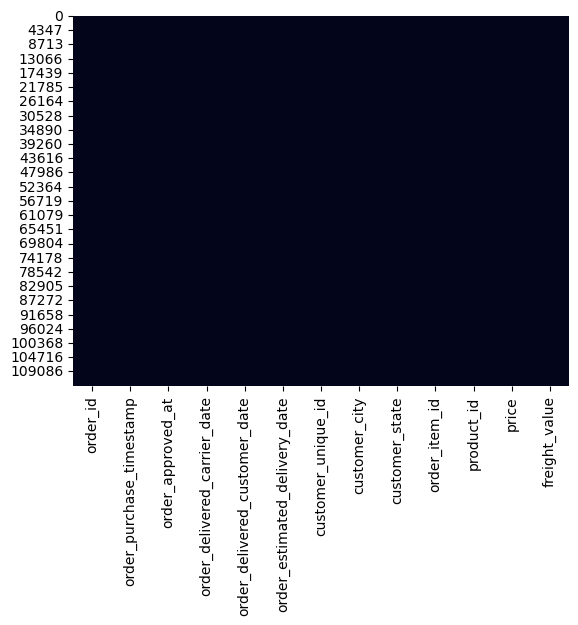

In [24]:
# heat map representation of missing values to see the distribution of missing values
sns.heatmap(df.isnull(), cbar=False)

The distribution of *missing value* seems random, so the missing value will be dropped with the condition: if there is at least one missing value in one of the columns, then the row is deleted

In [25]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [26]:
df.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

In [27]:
# size (rows, columns) of the data
df.shape

(110173, 13)

Based on this processing, now obtained data that is ready to be analyzed with 13 variables and 110173 rows.

## 7. Data Visualization

In the following sections, several aspects that can be used as information to increase their income are analyzed.

### A. Number of Purchases on *E-Commerce*

#### a. Trend of Number of Purchases in 2016 - 2018

In [28]:
# Convert 'order_purchase_timestamp' to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract year, month, year-month, day of week, and categorize purchase periods
df['purchase_year'] = df['order_purchase_timestamp'].dt.strftime('%Y')
df['purchase_month'] = df['order_purchase_timestamp'].dt.strftime('%b')
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y%m')
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.strftime('%a')
df['purchase_period'] = (df['order_purchase_timestamp'].dt.hour % 24 + 4) // 4

df['purchase_period'].replace(
    {1: 'Late Night', 
     2: 'Early Morning', 
     3: 'Morning', 
     4: 'Noon', 
     5: 'Evening', 
     6: 'Night'},
        inplace=True
)

df['month_num'] = df['purchase_month'].apply(lambda x: datetime.datetime.strptime(x, "%b").month)

# Display the first few rows
df.head()


,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_num
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,201710,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,201807,Tue,Night,7
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,201808,Wed,Morning,8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,201711,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,201802,Tue,Night,2


Text(0.5, 1.0, 'Trend of Purchases from 2017 to 2018')

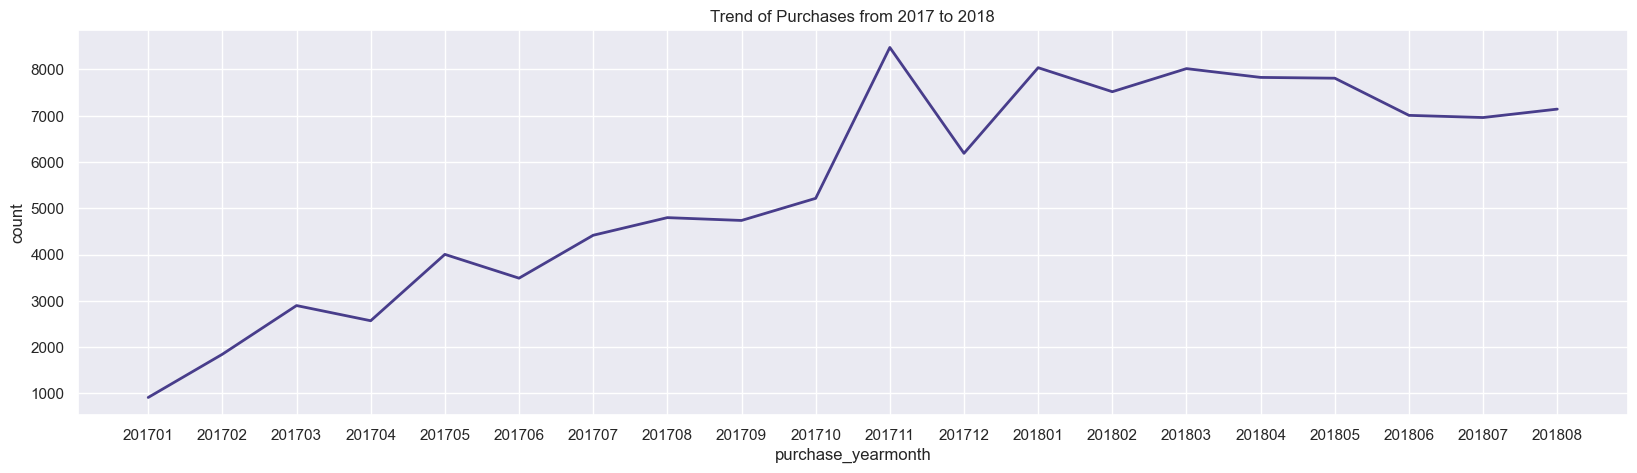

In [29]:
# Plotting of the purchasing trend from 2016 to 2018 using a line plot.
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(data=df['purchase_yearmonth'].value_counts().sort_index()[3:], 
             color='darkslateblue', linewidth=2)
plt.title('Trend of Purchases from 2017 to 2018') 

From the *line plot* above it can be seen that the sales trend
continues to increase even though there were some slight declines


In [30]:
cols = ['purchase_year', 'purchase_yearmonth'] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
# 'purchase_year' and 'purchase_yearmonth' will have their data type changed to integer

#### b. Tendency of Customers to Buy on *E-Commerce*

Text(0, 0.5, 'Number of Purcahses')

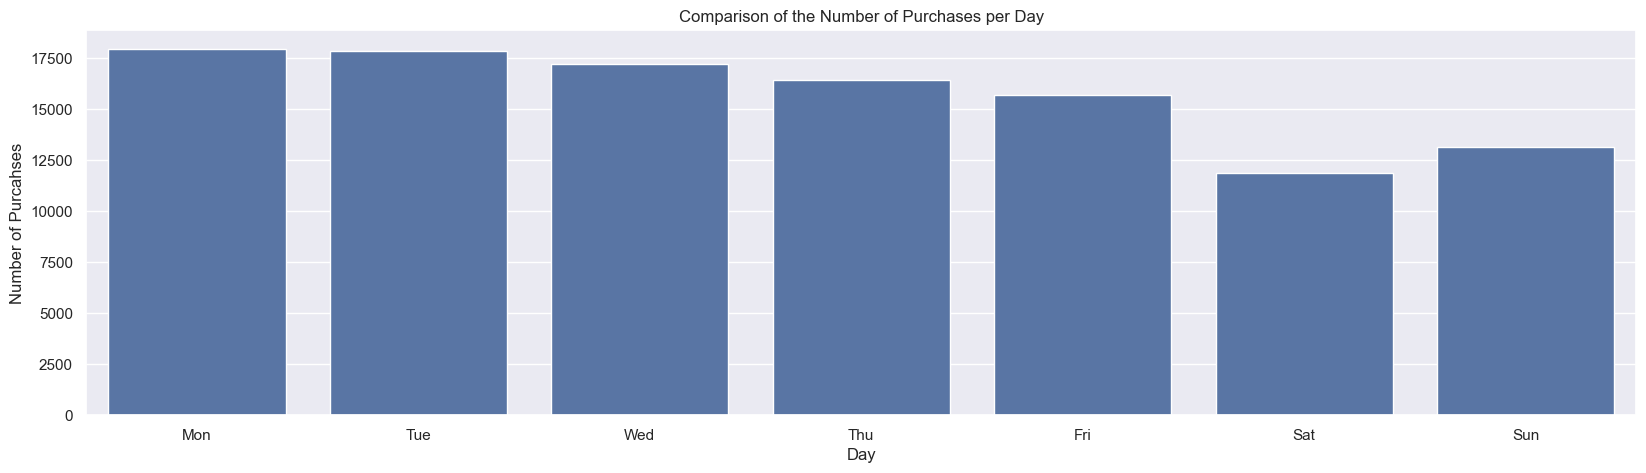

In [32]:
#Bar plot of the number of purchases per day
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.set(rc={'figure.figsize':(20,5)}) 
sns.countplot(x='purchase_dayofweek', data=df, order=order)

plt.title('Comparison of the Number of Purchases per Day') 
plt.xlabel('Day')
plt.ylabel('Number of Purcahses') 

It can be seen that the highest number of purchases is on Monday, while the least number of purchases is on Saturday

In [33]:
# total number of purchases per day
df['purchase_dayofweek'].value_counts()

purchase_dayofweek
Mon    17973
Tue    17857
Wed    17217
Thu    16431
Fri    15693
Sun    13126
Sat    11876
Name: count, dtype: int64

#### c. Tendency when customers buy on *E-Commerce*

C:\Users\utkar\AppData\Local\Temp\ipykernel_13872\1879590654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase_period', data=df, palette='YlGnBu', order=order)


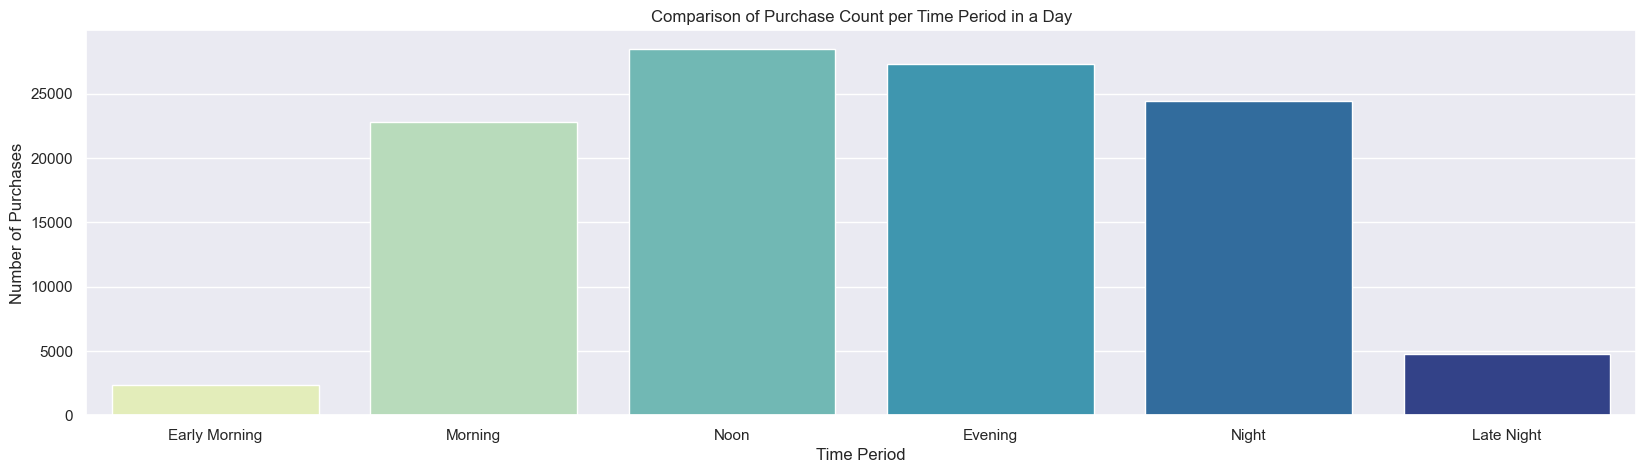

In [34]:
# Bar plot of the number of purchases in 6 time periods throughout the day
order=['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']
sns.countplot(x='purchase_period', data=df, palette='YlGnBu', order=order)
plt.title('Comparison of Purchase Count per Time Period in a Day')  # title of the plot
plt.xlabel('Time Period')  # label for x-axis
plt.ylabel('Number of Purchases')  # label for y-axis
plt.show()

In [35]:
# To see the total number of purchases in 6 time periods throughout the day
df['purchase_period'].value_counts()

purchase_period
Noon             28506
Evening          27279
Night            24432
Morning          22834
Late Night        4792
Early Morning     2330
Name: count, dtype: int64

#### d. Comparison of Number of Purchases Per Month in 2017 and 2018

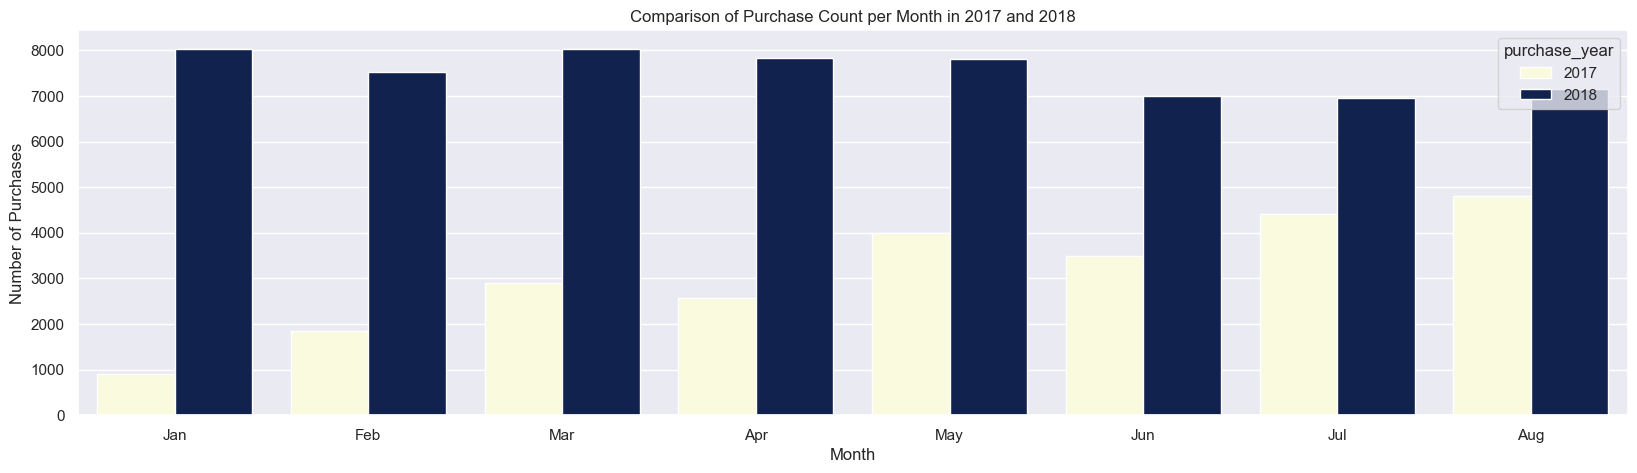

In [36]:
df_compare = df.query('purchase_year in (2017, 2018) & month_num <= 8')
year_orders = df_compare['purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']  # labels for x-axis

sns.countplot(x='purchase_month', data=df_compare, hue='purchase_year', palette='YlGnBu', order=order)
plt.title('Comparison of Purchase Count per Month in 2017 and 2018')  # title of the plot
plt.xlabel('Month')  # label for x-axis
plt.ylabel('Number of Purchases')  # label for y-axis
plt.show()


From the following *bar plot*, it can be seen that the number of purchases in 2018 was greater than in 2017 every month.
Sales efforts carried out by e-commerce  were quite optimal in 2018 compared to 2017.

In [37]:
# total number of purchases per month in 2017
df_compare[df_compare['purchase_year']==2017]['purchase_month'].value_counts()

purchase_month
Aug    4797
Jul    4416
May    4003
Jun    3489
Mar    2897
Apr    2569
Feb    1845
Jan     911
Name: count, dtype: int64

In [38]:
# total number of purchases per month in 2018
df_compare[df_compare['purchase_year']==2018]['purchase_month'].value_counts()

purchase_month
Jan    8037
Mar    8017
Apr    7827
May    7810
Feb    7518
Aug    7142
Jun    7007
Jul    6960
Name: count, dtype: int64

In [39]:
# number of Purchases by City

In [40]:
# To count the number of purchases in each city
df_city = df.groupby(by='customer_city', as_index=False).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).reset_index(drop=True) 
# To see the 10 cities with the highest number of purchases
df_city_big = df_city.head() 
# To see the 20 cities with the lowest number of purchases
df_city_small = df_city.tail(20) 

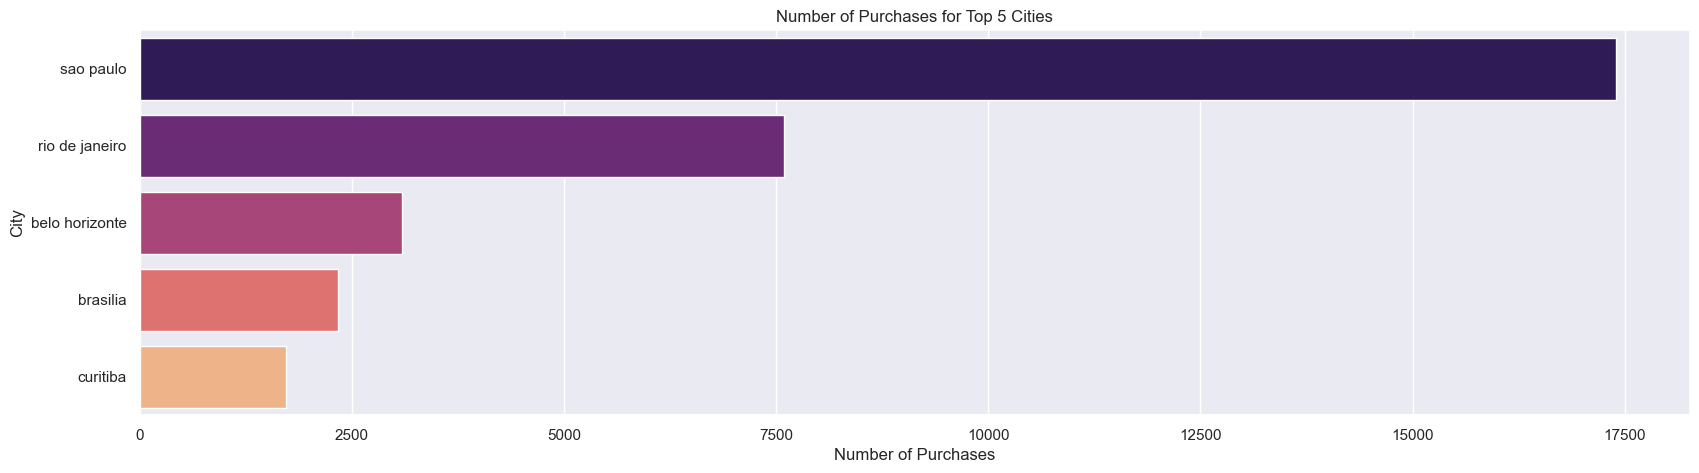

In [41]:
# Bar plot for the number of purchases by city
sns.barplot(y='customer_city', x='order_id', data=df_city_big, palette='magma', hue='customer_city', dodge=False, legend=False)
plt.title('Number of Purchases for Top 5 Cities')
plt.xlabel('Number of Purchases')
plt.ylabel('City')

plt.show()


From the *plot* below, it can be seen that the city of Sao Paulo has the highest number of purchases while the city of Sao Bernardo do Campo has the least number of purchases.

In [42]:
# To see the total number of purchases for the top 5 cities
df_city.sort_values('order_id',ascending=False)

,customer_city,order_id
0,sao paulo,17398
1,rio de janeiro,7590
2,belo horizonte,3087
3,brasilia,2341
4,curitiba,1727
...,...,...
3387,arenopolis,1
3388,terenos,1
3389,lagoa real,1
3390,araripe,1


#### f. Number of Customers Based on State

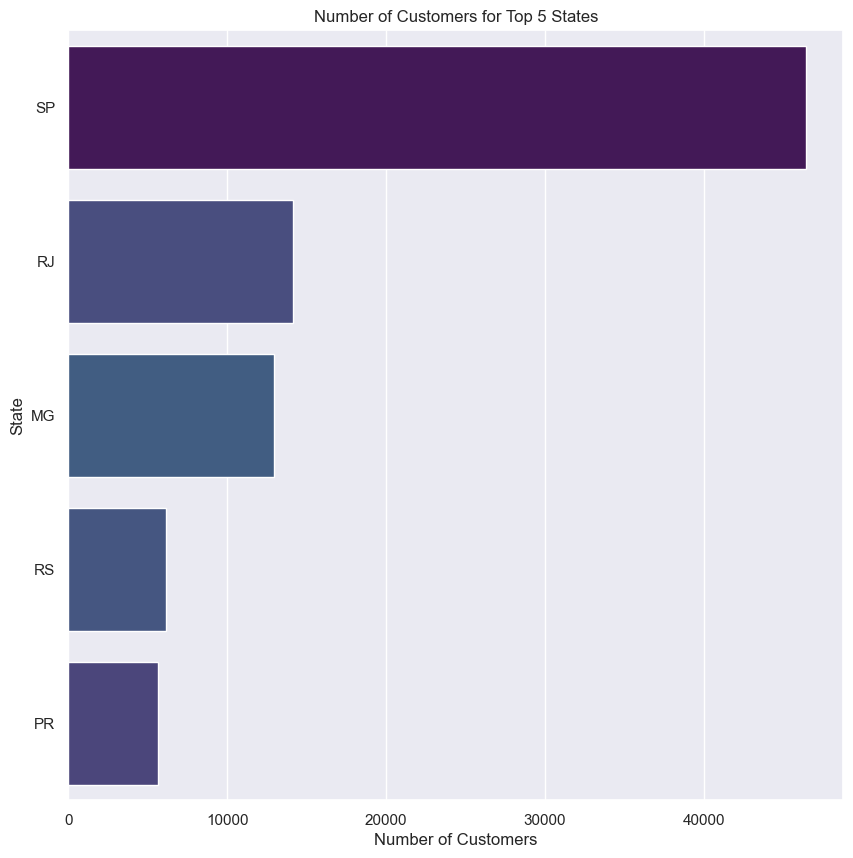

In [43]:
sns.set(rc={'figure.figsize': (10, 10)})  

# Bar plot for the number of customers by state, correcting the palette usage
sns.countplot(y='customer_state', data=df, palette='viridis', 
              order=df['customer_state'].value_counts().iloc[:5].index, 
              hue='customer_state', dodge=False, legend=False)
plt.title('Number of Customers for Top 5 States')
plt.xlabel('Number of Customers')
plt.ylabel('State')

plt.show()


Based on the picture above, the largest number of customers come from Sao Paulo

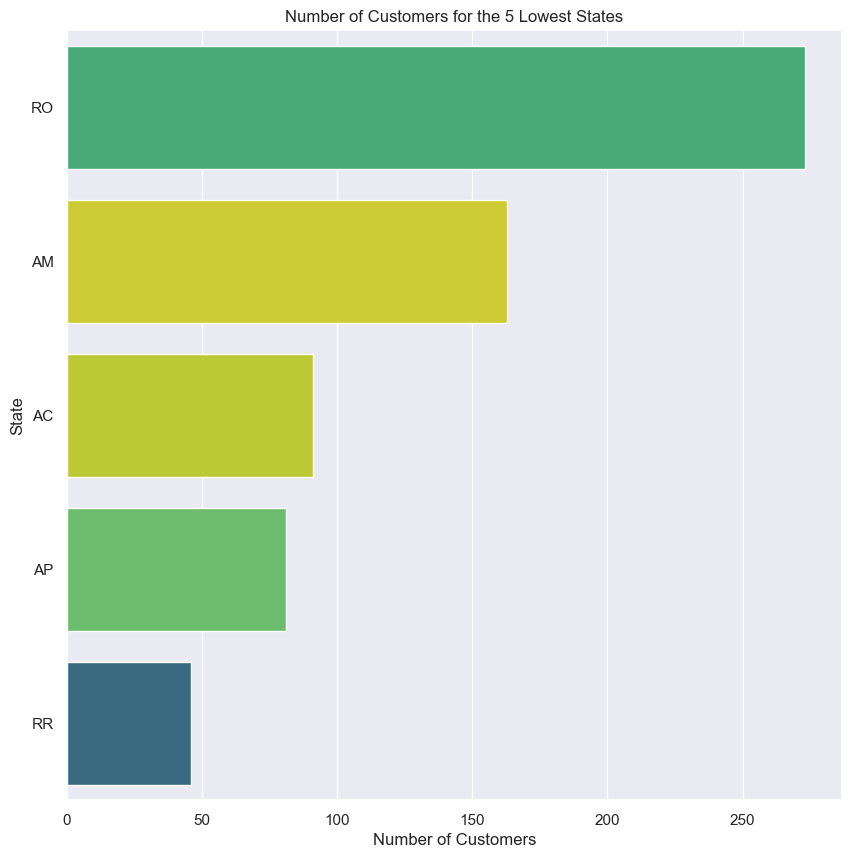

In [44]:
sns.set(rc={'figure.figsize': (10, 10)})  

# Bar plot for the number of customers by state, showing the 5 states with the lowest number of customers
sns.countplot(y='customer_state', data=df, palette='viridis', 
              order=df['customer_state'].value_counts().iloc[-5:].index,
             hue='customer_state', dodge=False, legend=False)
plt.title('Number of Customers for the 5 Lowest States')
plt.xlabel('Number of Customers')
plt.ylabel('State')

plt.show()

Based on the picture above, the least number of *customers* comes from Roraima(RR)

In [45]:
#the total number of customers for the bottom 5 states
df['customer_state'].value_counts().iloc[-5:]

customer_state
RO    273
AM    163
AC     91
AP     81
RR     46
Name: count, dtype: int64

In [46]:
df['customer_state'].value_counts().iloc[:10]

customer_state
SP    46435
RJ    14140
MG    12913
RS     6131
PR     5649
SC     4097
BA     3683
DF     2355
GO     2277
ES     2225
Name: count, dtype: int64

### B.Economy *E-Commerce*

#### a. Trend of Total Income

Revenue is the total cost of ordering along with shipping costs.

In [47]:
df_month = df.groupby(by=['purchase_year', 'purchase_yearmonth'], as_index=False).agg({
    'order_id': 'count',  # to count the number of purchases
    'price': 'sum',  # to calculate the total purchase amount
    'freight_value': 'sum'})  # to calculate the total shipping cost
df_month['price_per_order'] = df_month['price'] / df_month['order_id']  # to calculate the average price per purchase
df_month['freight_per_order'] = df_month['freight_value'] / df_month['order_id']  # to calculate the average shipping cost per purchase
df_month['purchase_yearmonth'] = df_month['purchase_yearmonth'].astype('str')  # to change the type of 'purchase_yearmonth' to 'object'
df_month.head()  

,purchase_year,purchase_yearmonth,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,201609,3,134.97,8.49,44.990000,2.830000
1,2016,201610,313,40325.11,6165.55,128.834217,19.698243
2,2016,201612,1,10.90,8.72,10.900000,8.720000
3,2017,201701,911,111712.47,15654.97,122.626202,17.184380
4,2017,201702,1845,232638.86,36760.79,126.091523,19.924547


Text(0, 0.5, 'Purchase Amount')

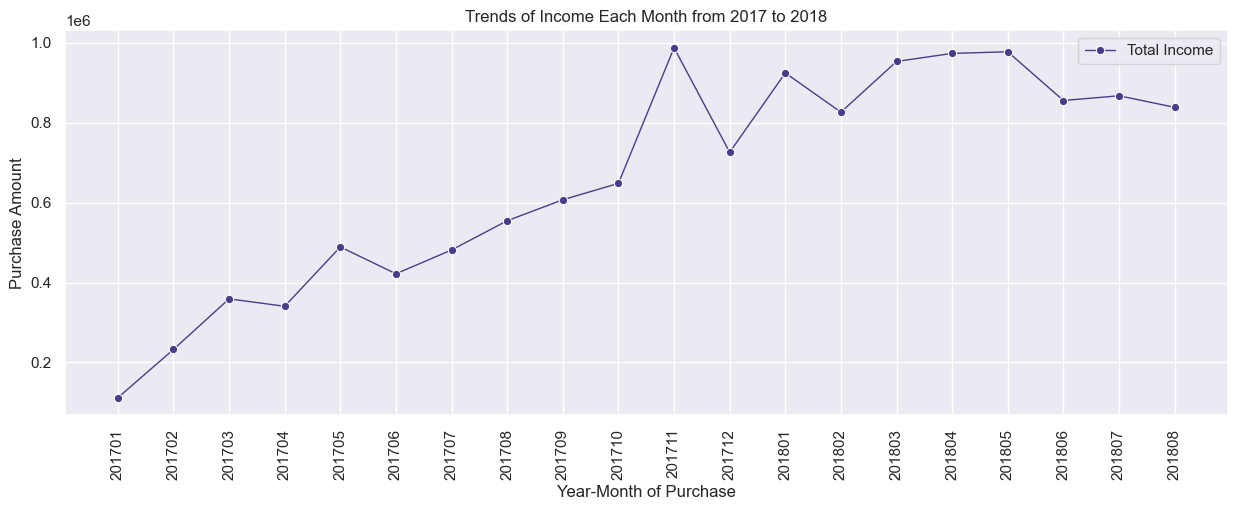

In [48]:
# plotting the total purchases each month from 2017 to 2018
sns.set(rc={'figure.figsize': (15, 5)}) 
plt.xticks(rotation=90)  # to rotate each label on the x-axis 90 degrees to the left
sns.lineplot(x='purchase_yearmonth', y='price', data=df_month[3:], linewidth=1, 
             color='darkslateblue', marker='o', label='Total Income')
plt.title('Trends of Income Each Month from 2017 to 2018')  
plt.xlabel('Year-Month of Purchase') 
plt.ylabel('Purchase Amount') 

Overall, the trend of income has been increasing for each month although there was a significant decrease in December 2017 and income started to increase slightly in April 2018

#### b. Purchase Amount

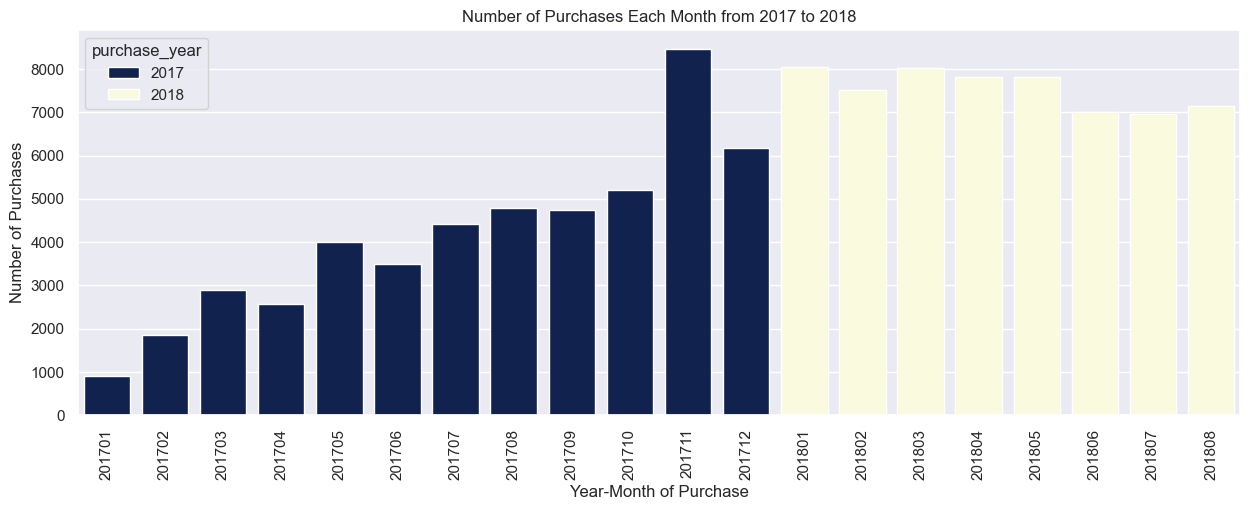

In [49]:
# Bar plot to visualize the number of purchases each month from 2017 to 2018
plt.xticks(rotation=90)

# Create the count plot, excluding 2016 purchases, and setting the color palette
sns.countplot(x='purchase_yearmonth', data=df[df['purchase_year'] != 2016], palette='YlGnBu_r', hue='purchase_year')
plt.title('Number of Purchases Each Month from 2017 to 2018')
plt.xlabel('Year-Month of Purchase')
plt.ylabel('Number of Purchases')

plt.show()


From the bar plot above, it can be seen that the amount of income has increased until November 2017 even though it decreased in December 2017. Then the amount of income was evenly distributed after December 2017

#### c. Total Purchase Price Based on State

Text(0, 0.5, 'State')

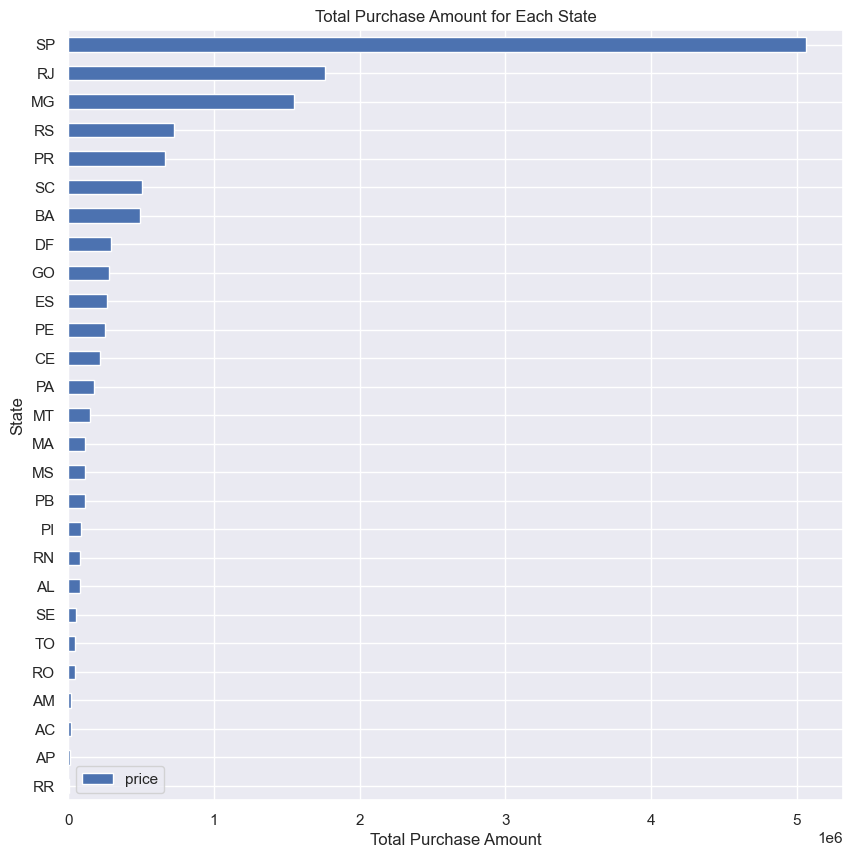

In [50]:
# Bar chart to see the total purchase amount by state
sns.set(rc={'figure.figsize': (10, 10)})
df.groupby('customer_state').agg({'price': 'sum'}).sort_values('price').plot(kind='barh')  # to calculate the total purchase amount for each state
plt.title('Total Purchase Amount for Each State') 
plt.xlabel('Total Purchase Amount')
plt.ylabel('State') 

# It can be seen that the highest total purchase price comes from *state* Sao Paulo (SP) while the lowest total purchase price comes from *state* Roraima (RR).

#### d. Average Price by State

Text(0, 0.5, 'State')

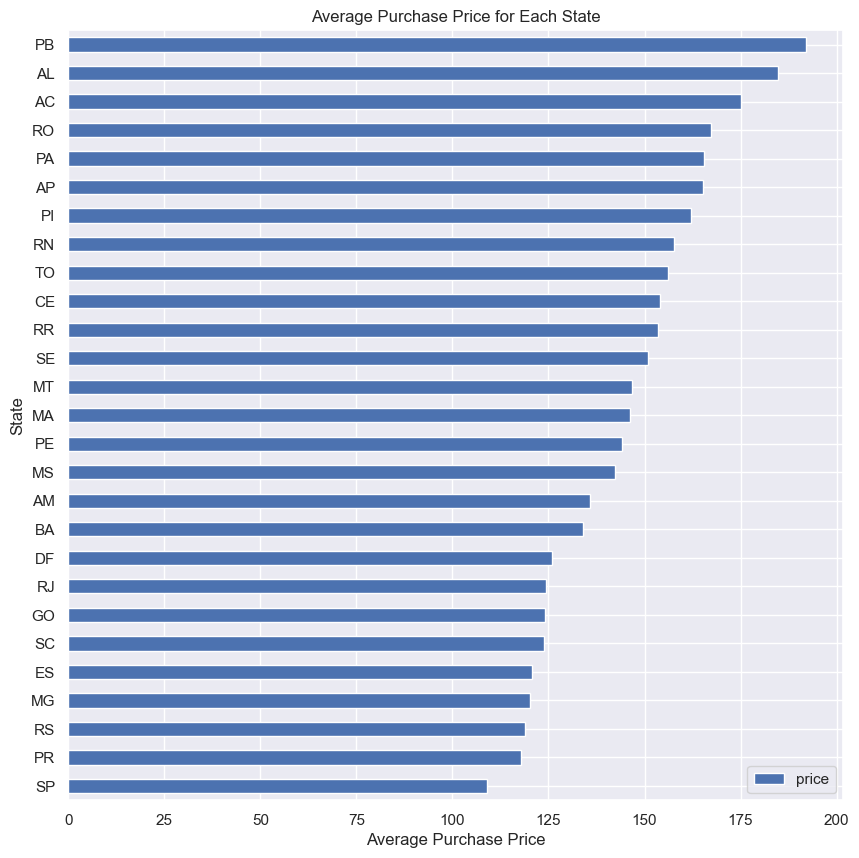

In [51]:
# Bar chart to see the average product price by state
sns.set(rc={'figure.figsize': (10, 10)})  # for plot size
df.groupby('customer_state').agg({'price': 'mean'}).sort_values('price').plot(kind='barh')  # to calculate the average purchase price for each state
plt.title('Average Purchase Price for Each State') 
plt.xlabel('Average Purchase Price')  
plt.ylabel('State')  


It can be seen that *state* Paraiba (PB) has the highest average purchase price, while *state* Sao Paulo (SP) has the lowest average purchase price

In [52]:
df.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending=False)

,price
customer_state,
PB,192.127679
AL,184.673817
AC,175.065604
RO,167.336117
PA,165.531869
AP,165.121111
PI,161.990440
RN,157.592438
TO,156.137129


#### e. Trend of Average Shipping Prices

In [54]:
#line plot to see the trend of average shipping cost per purchase every month from 2017 to 2018
# plt.xticks(rotation=90) #to rotate the x-axis labels by 90 degrees
# sns.lineplot(x='purchase_yearmonth', y='freight_per_order', data=df_bulan[3:], linewidth=2, 
#              color='black', marker='o')
# plt.title('Trend of Average Shipping Cost per Purchase Every Month from 2017 to 2018') 
# plt.xlabel('Purchase Year-Month') 
# plt.ylabel('Average Shipping Cost per Purchase') 


From the chart above, the average trend of shipments per order has increased in February 2017 and evenly thereafter until February 2018. Then as a whole, after February 2018 there has been a large increase despite experiencing several small decreases and a large decrease in August 2018

#### f. Total Shipping Prices Based on State

Text(0, 0.5, 'State')

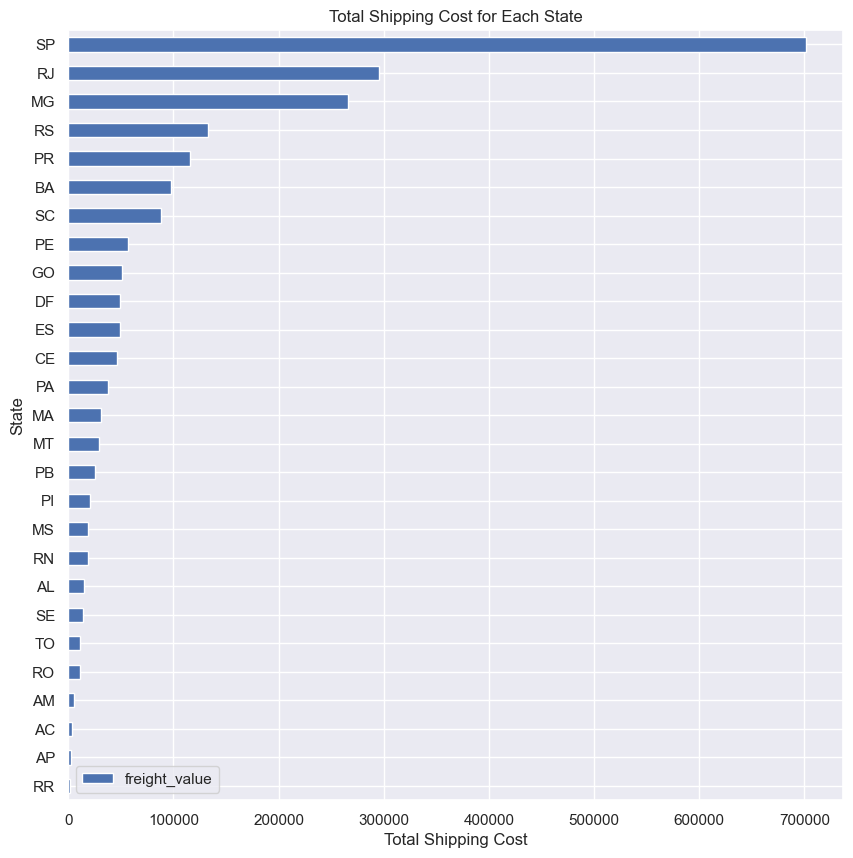

In [55]:
#bar chart to see the total shipping cost by state
sns.set(rc={'figure.figsize':(10,10)}) 
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value').plot(kind='barh') #to calculate the total shipping cost for each state
plt.title('Total Shipping Cost for Each State') 
plt.xlabel('Total Shipping Cost') 
plt.ylabel('State')

The largest total shipping price is shipping to Sao Paulo(SP), while the lowest is to Roraima(RR)

In [56]:
#to see the total shipping cost in each state, from lowest to highest
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value')


,freight_value
customer_state,
RR,1982.05
AP,2767.00
AC,3644.36
AM,5429.63
RO,11283.24
TO,11604.86
SE,13714.94
AL,15316.77
RN,18609.12


#### h.Delivery Analysis

In [57]:

# Convert relevant columns to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])  # to convert to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])  # to convert to datetime
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])  # to convert to datetime

# Calculate time to delivery
purchasing = df['order_purchase_timestamp']  # to get purchase timestamp
delivered = df['order_delivered_customer_date']  # to get delivery date
estimated = df['order_estimated_delivery_date']  # to get estimated delivery date

# Calculate delivery time and difference from estimated delivery
df['time_to_delivery'] = delivered - purchasing  # to calculate delivery time
df['diff_estimated_delivery'] = delivered - estimated  # to calculate the difference from estimated delivery time


In [58]:
df['time_to_delivery'] = df['time_to_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #Convert to hours
df['diff_estimated_delivery'] = df['diff_estimated_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #Convert to hours


#df['time_to_delivery'] = df['time_to_delivery'].dt.total_seconds() / 3600
#df['diff_estimated_delivery'] = df['diff_estimated_delivery'].dt.total_seconds() / 3600



In [59]:
# Check data types to identify non-numeric columns
print(df.dtypes)

# Convert relevant columns to numeric (if they are not already)
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')
df['time_to_delivery'] = pd.to_numeric(df['time_to_delivery'], errors='coerce')
df['diff_estimated_delivery'] = pd.to_numeric(df['diff_estimated_delivery'], errors='coerce')

# Calculate the mean of numeric variables grouped by customer state
df_state = df.groupby(by='customer_state', as_index=False).mean(numeric_only=True)  # Ensure only numeric columns are considered

# Sort states based on freight value
state_freight = df_state[['customer_state', 'freight_value']].sort_values(by='freight_value', ascending=False)

# Sort states based on time to delivery
state_time_to_delivery = df_state[['customer_state', 'time_to_delivery']].sort_values(by='time_to_delivery', ascending=False)

# Sort states based on difference from estimated delivery
state_estimated_delivery = df_state[['customer_state', 'diff_estimated_delivery']].sort_values(by='diff_estimated_delivery')


order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_item_id                            object
product_id                               object
price                                   float64
freight_value                           float64
purchase_year                             int64
purchase_month                           object
purchase_yearmonth                        int64
purchase_dayofweek                       object
purchase_period                          object
month_num                                 int64
time_to_delivery                        float64
diff_estimated_delivery                 

In [60]:
# to see the difference between the actual delivery time and the estimated delivery time
state_estimated_delivery


,customer_state,diff_estimated_delivery
0,AC,-487.988181
20,RO,-464.186358
2,AM,-461.424899
3,AP,-426.441255
21,RR,-422.841002
12,MT,-333.504799
13,PA,-325.664633
22,RS,-322.324935
19,RN,-318.399827
17,PR,-307.008811


Because all *states* have different *delivery* times and estimates are negative, meaning that **delivery to all *states* arrives earlier than the estimated estimated time**

In [61]:
# difference between the actual delivery time and the estimated delivery time in the 'diff_estimated_delivery' column 
# is converted to its absolute value
state_estimated_delivery['diff_estimated_delivery'] = state_estimated_delivery['diff_estimated_delivery'].abs()  
state_estimated_delivery 


,customer_state,diff_estimated_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002
12,MT,333.504799
13,PA,325.664633
22,RS,322.324935
19,RN,318.399827
17,PR,307.008811


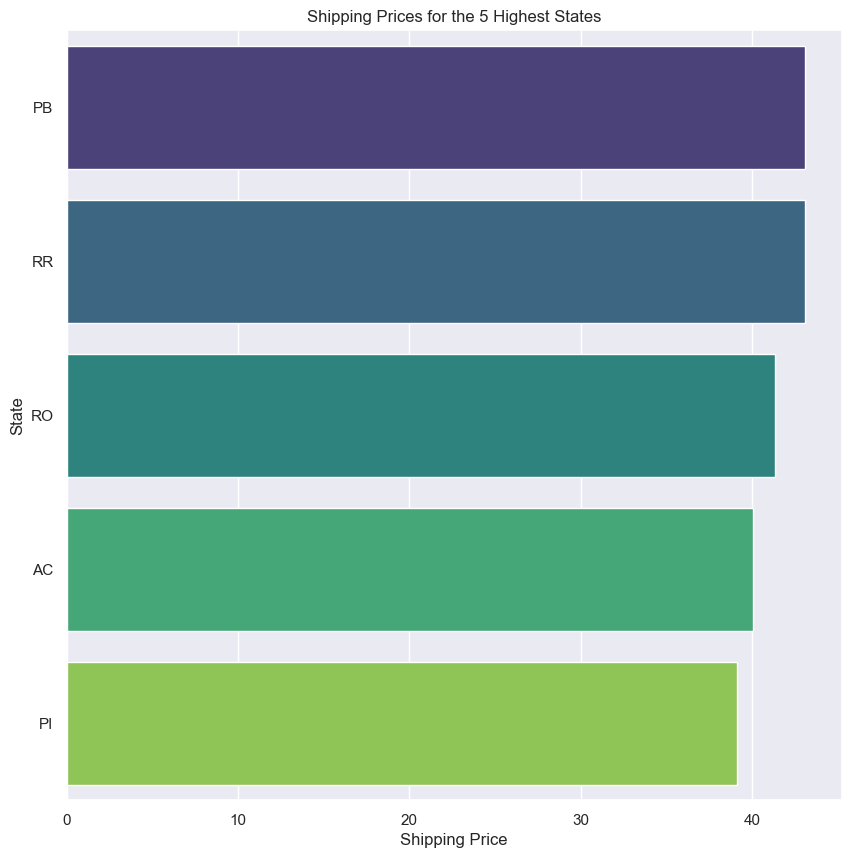

In [62]:
# Plotting the top 5 states with the highest shipping prices
sns.barplot(x='freight_value', y='customer_state', data=state_freight.head(), palette='viridis', hue='customer_state', legend=False)
plt.title('Shipping Prices for the 5 Highest States')  # Title for the plot
plt.xlabel('Shipping Price')  # Label for the x-axis
plt.ylabel('State')  # Label for the y-axis
plt.show()


It can be seen that the highest shipping price is the shipping price to Paraiba(PB)

In [63]:
# the shipping costs for the top 5 states
state_freight[['customer_state', 'freight_value']].sort_values('freight_value', ascending=False)[:5]  


,customer_state,freight_value
14,PB,43.091689
21,RR,43.088043
20,RO,41.330549
0,AC,40.047912
16,PI,39.115086


Text(0, 0.5, 'State')

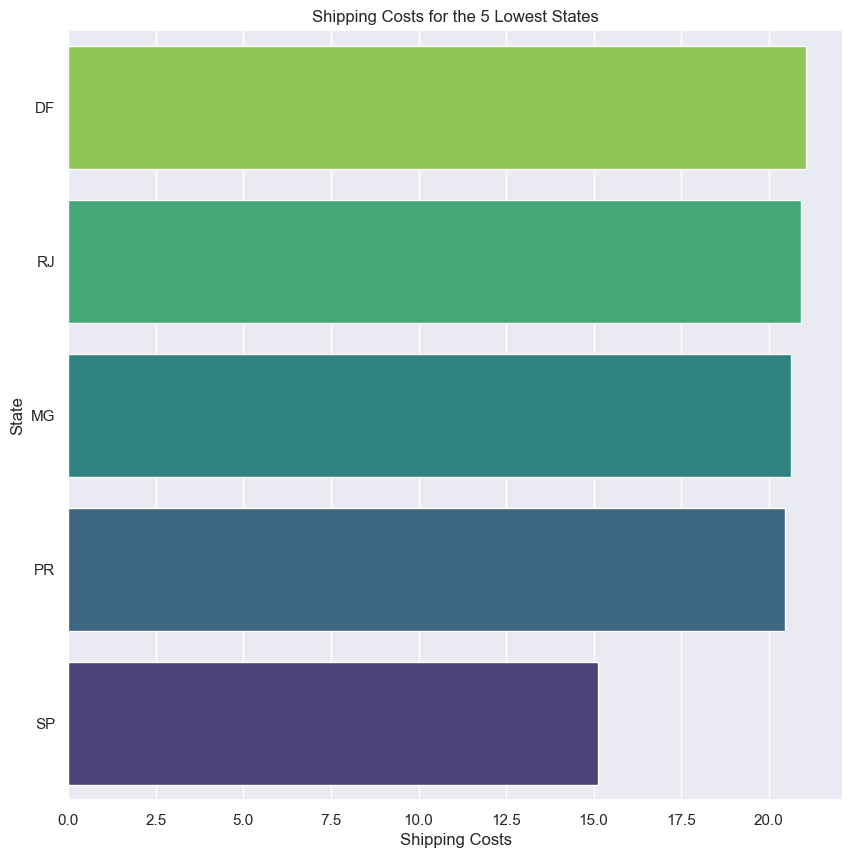

In [64]:
# the 5 states with the lowest shipping costs
sns.barplot(x='freight_value', y='customer_state', data=state_freight.tail(), palette='viridis_r', hue='customer_state', legend=False)
plt.title('Shipping Costs for the 5 Lowest States')  
plt.xlabel('Shipping Costs')  
plt.ylabel('State')  

While the lowest shipping price is the shipping price to Sao Paulo(SP)

In [65]:
# the shipping costs for the 5 lowest states
state_freight[['customer_state', 'freight_value']].sort_values('freight_value', ascending=False).tail()


,customer_state,freight_value
6,DF,21.072161
18,RJ,20.912704
10,MG,20.627192
17,PR,20.471816
25,SP,15.114601


Text(0, 0.5, 'State')

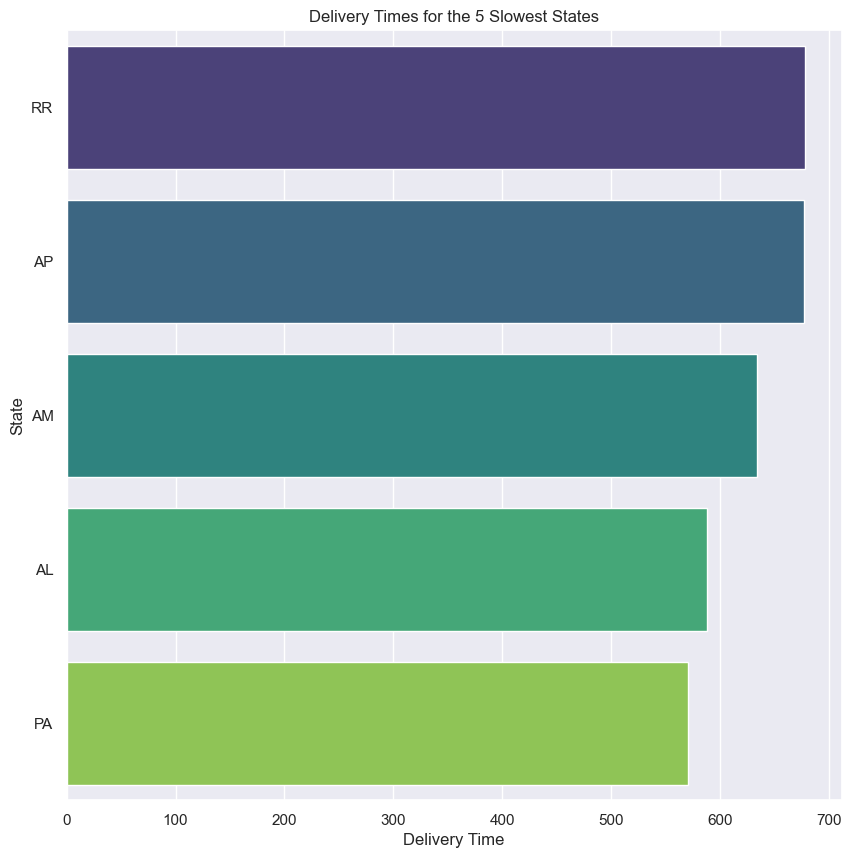

In [66]:
# the 5 states with the longest delivery times
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.head(), palette='viridis', hue='customer_state')
plt.title('Delivery Times for the 5 Slowest States')  
plt.xlabel('Delivery Time') 
plt.ylabel('State')  


In [67]:
# the delivery times for the 5 slowest states (in hours)
state_time_to_delivery[['customer_state', 'time_to_delivery']].sort_values('time_to_delivery', ascending=False).head()


,customer_state,time_to_delivery
21,RR,677.544275
3,AP,676.943035
2,AM,633.383212
1,AL,587.739403
13,PA,570.097281


Text(0, 0.5, 'State')

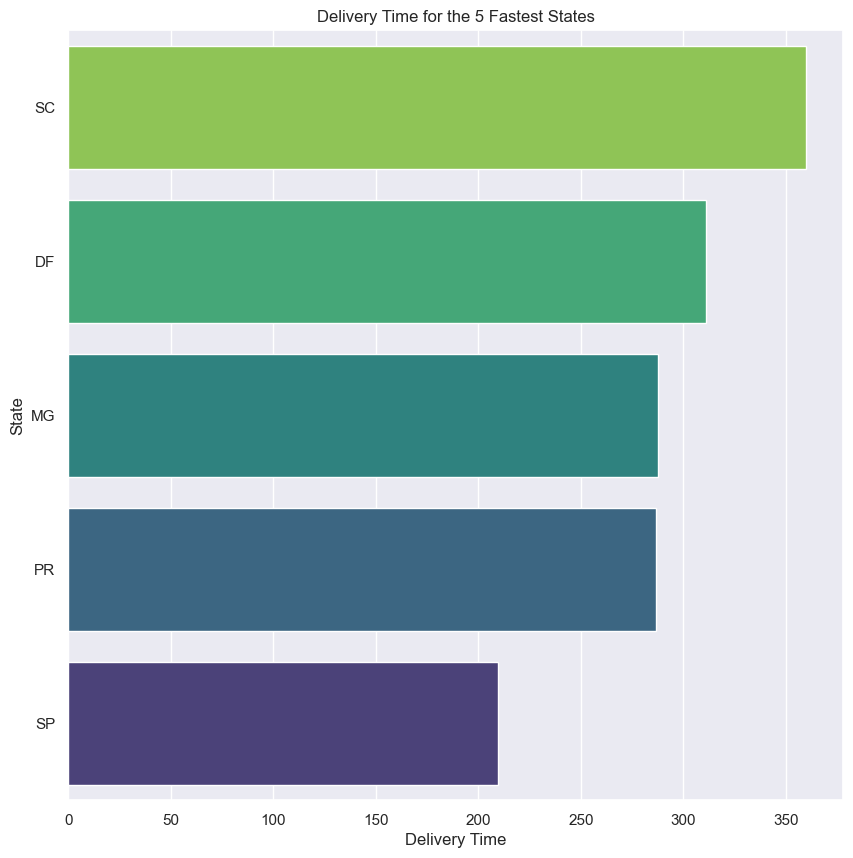

In [68]:
# To see the delivery time for the 5 fastest states
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.tail(), palette='viridis_r', hue='customer_state')
plt.title('Delivery Time for the 5 Fastest States')  # to give a title to the plot
plt.xlabel('Delivery Time')  # to label the x-axis
plt.ylabel('State')  # to label the y-axis


Meanwhile *state* Sao Paulo(SP) has the fastest delivery time

In [69]:
#to see the delivery time for the 5 fastest states (in hours)
state_time_to_delivery[['customer_state','time_to_delivery']].sort_values('time_to_delivery',ascending=False).tail()

,customer_state,time_to_delivery
23,SC,359.943437
6,DF,311.015835
10,MG,287.556996
17,PR,286.733214
25,SP,209.343141


Text(0, 0.5, 'State')

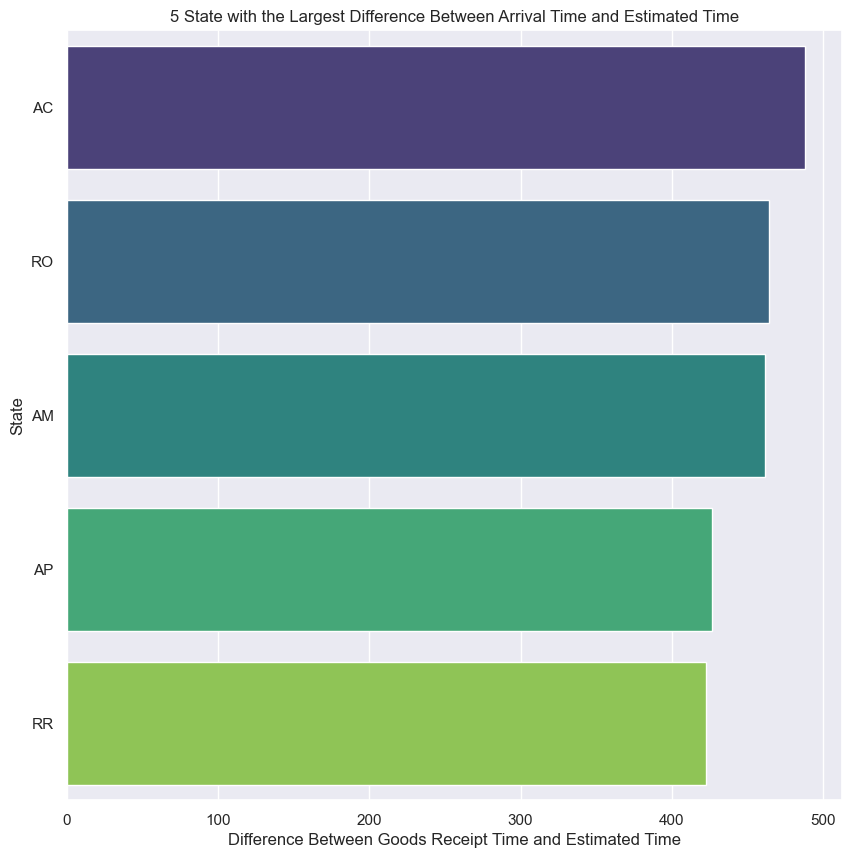

In [70]:
#to see the 5 states with the largest difference in arrival time and estimated time
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.head(), palette='viridis', hue='customer_state')
plt.title('5 State with the Largest Difference Between Arrival Time and Estimated Time') 
plt.xlabel('Difference Between Goods Receipt Time and Estimated Time') 
plt.ylabel('State') 

It can be observed that there is a delivery to the state of Acre (AC) with the fastest delivery time, which is quicker than its estimated time.

In [71]:
#the largest difference between arrival time and estimated time for the 5 states with the largest values
state_estimated_delivery[['customer_state', 'diff_estimated_delivery']].sort_values('diff_estimated_delivery', ascending=False).head()


,customer_state,diff_estimated_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002


Text(0, 0.5, 'State')

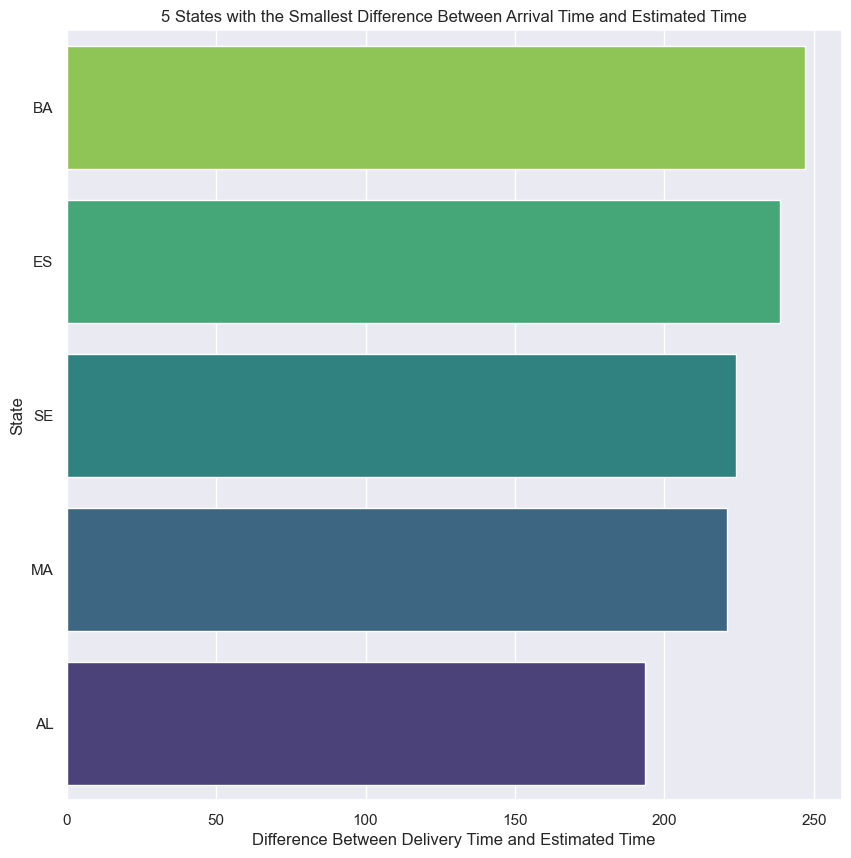

In [72]:
# To see the 5 states with the smallest difference between arrival time and estimated time
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.tail(), palette='viridis_r', hue='customer_state')
plt.title('5 States with the Smallest Difference Between Arrival Time and Estimated Time') 
plt.xlabel('Difference Between Delivery Time and Estimated Time') 
plt.ylabel('State') 


In *state* Alagoas(AL) there is a late delivery time that is faster than the estimated time

In [73]:
# the difference between arrival time and estimated time for the 5 smallest states
state_estimated_delivery[['customer_state', 'diff_estimated_delivery']].sort_values('diff_estimated_delivery', ascending=False).tail()


,customer_state,diff_estimated_delivery
4,BA,246.925482
7,ES,238.781078
24,SE,223.817613
9,MA,220.860777
1,AL,193.376353


# III. Methodology (Machine Learning):
In this section, we will create a model that can perform *customer segmentation*. *Customer segmentation* itself is an *unsupervised* problem so that our data does not have a label, but later we ourselves will provide a label. Algorithm that can be used:
- RFM Sementation
- K-Means

## Data (Machine Learning):
- Unit Analysis:
  - Customer behavior: Customer Unique ID

- Features:
  - Recency: Measures the last time a customer made a transaction.

  - Frequency: Measures how often a customer makes a transaction.

  - Monetary: Measures the total transactions made by a customer.

## RFM Segmentation 
RFM stands for *Recency, Frequency* and *Monetary*. Each factor adjusts to the characteristics of *customer*. This RFM metric is an important indicator of *customer* behavior segmentation because *frequency* and *monetary* affect *customer lifetime value*, and *recency* affects *engagement rate.*

The *RFM Analysis* application on this data aims to segment *customers*, so that e-commerce can apply sales/marketing strategies that suit the characteristics of these *customers*.

## 1. Dataset Preparation

Because what is analyzed is *customer* characteristics, the previous data is grouped based on *customer*. 


In [74]:
import pandas as pd
from datetime import datetime, timedelta

# Modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Regular Expression
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [75]:
df1 = pd.merge(df,or_pay,on='order_id',how='left') 
df1.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,purchase_yearmonth,purchase_dayofweek,purchase_period,month_num,time_to_delivery,diff_estimated_delivery,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,...,201807,Tue,Night,7,330.768889,-128.537500,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,...,201808,Wed,Morning,8,225.461111,-413.891944,1.0,credit_card,3.0,179.12


In [76]:
df1 = df1.drop(['payment_installments', 'payment_sequential'], axis = 1)

In [77]:
# Recency
now = datetime.now()
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1['recency'] = (now - df1['order_purchase_timestamp']).dt.days

# Frequency
data_frequency = df1.groupby('order_item_id').order_purchase_timestamp.count()
data_frequency = data_frequency.reset_index()
data_frequency.columns = ['order_item_id','frequency']
df1 = df1.merge(data_frequency, on='order_item_id')

# Monetary
data_monetary = df1.groupby('order_item_id').payment_value.sum()
data_monetary = data_monetary.reset_index()
data_monetary.columns = ['order_item_id','monetary']
df1 = df1.merge(data_monetary, on='order_item_id')



In [78]:
df1.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery',
       'payment_type', 'payment_value', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [79]:
# Group data by customer_unique_id
rfm = df1.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (df1['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
})

In [80]:
# Rename columns
rfm.rename(columns={'order_purchase_timestamp': 'recency',
                   'order_id': 'frequency',
                   'price': 'monetary'}, inplace=True)


In [81]:
# Assign score
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=list(range(4, 0, -1)))
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=4, labels=list(range(4, 5)), duplicates='drop')
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=4, labels=list(range(1, 5)), duplicates='drop')

# Create RFM_Score
rfm['RFM_Score'] = rfm[['recency_score', 'frequency_score', 'monetary_score']].sum(axis=1)


In [82]:
# For most use cases, people usually look at one year data
rfm = rfm[rfm['recency'] <= 365]

In [83]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72759 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffff5962728ec6157033ef9805bacc48
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recency          72759 non-null  int64   
 1   frequency        72759 non-null  int64   
 2   monetary         72759 non-null  float64 
 3   recency_score    72759 non-null  category
 4   frequency_score  72759 non-null  category
 5   monetary_score   72759 non-null  category
 6   RFM_Score        72759 non-null  int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 3.0+ MB


## We'll do 5x5x5 RFM analysis

In [84]:
# Check the data types of the columns in the rfm DataFrame
print(rfm.dtypes)


recency               int64
frequency             int64
monetary            float64
recency_score      category
frequency_score    category
monetary_score     category
RFM_Score             int64
dtype: object


In [85]:
# Get only numeric columns for quantile calculation
numeric_columns = rfm.select_dtypes(include=['number'])

# Calculate quantiles for the numeric columns only
quantiles = numeric_columns.quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
print(quantiles)


{'recency': {0.2: 70.0, 0.4: 138.0, 0.6: 204.0, 0.8: 275.0}, 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}, 'monetary': {0.2: 39.99, 0.4: 69.9, 0.6: 113.97999999999999, 0.8: 185.12400000000008}, 'RFM_Score': {0.2: 8.0, 0.4: 9.0, 0.6: 10.0, 0.8: 11.0}}


### Quantile Results Breakdown

1. **Recency**: 
   - Indicates the number of days since the customer's last purchase. 
   - **Quantiles**:
     - 20th percentile: 70 days
     - 40th percentile: 138 days
     - 60th percentile: 204 days
     - 80th percentile: 275 days

2. **Frequency**: 
   - Represents the total number of purchases made by a customer. 
   - **Quantiles**:
     - All quantiles (20th, 40th, 60th, 80th) are 1.0, indicating that at least 80% of the customers have made only 1 purchase.

3. **Monetary**: 
   - Reflects the total monetary value spent by the customer. 
   - **Quantiles**:
     - 20th percentile: $39.99
     - 40th percentile: $69.90
     - 60th percentile: $113.98
     - 80th percentile: $185.12

4. **RFM_Score**: 
   - A composite score calculated based on recency, frequency, and monetary metrics. 
   - **Quantiles**:
     - 20th percentile: 8
     - 40th percentile: 9
     - 60th percentile: 10
     - 80th percentile: 11

### Interpretation
- **Recency** shows that a significant portion of customers haven't purchased in a while, with most customers last purchasing over 70 days ago.
- **Frequency** indicates low repeat purchases, with most customers being one-time buyers.
- **Monetary** values suggest that customers who spend more are in the higher percentiles, but the majority are in the lower spending range.
- **RFM_Score** reflects a scoring system that likely combines these factors, which could be useful for segmenting customers into different groups based on their behavior.


In [86]:
def r_score(x):
    if x <= 14:
        return 5
    elif x <= 30:
        return 4
    elif x <= 60:
        return 3
    elif x <= 180:
        return 2
    else:
        return 1

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 4:
        return 3
    elif x <= 6:
        return 4
    else:
        return 5

def m_score(x):
    if x <= 250:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    else:
        return 5   

In [87]:
rfm['R_score'] = rfm['recency'].apply(r_score)
rfm['F_score'] = rfm['frequency'].apply(f_score)
rfm['M_score'] = rfm['monetary'].apply(m_score)
rfm['RFM_score'] = rfm['R_score'] * 100 + rfm['F_score'] * 10 + rfm['M_score']

In [88]:
# Take a peak of our RFM table by CustomerID
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,R_score,F_score,M_score,RFM_score
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,4,3,11,2,1,1,211
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,4,1,8,2,1,1,211
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,4,1,7,1,1,1,111
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,4,4,10,1,1,1,111
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,3,4,3,10,2,1,1,211


In [89]:
# Convert the RFM_score into string
rfm['RFM_score'] = rfm['RFM_score'].astype('str')

In [90]:
# F-R plot: Count the number of users in each F-R pair.
rfm_count = pd.pivot_table(rfm, values='RFM_score', index= ['F_score'],
                    columns=['R_score'], aggfunc='size', fill_value=0)
rfm_count

R_score,1,2,3,4,5
F_score,,,,,
1,29189,21808,4773,3824,2235
2,3875,2904,596,443,250
3,1066,800,154,133,60
4,208,187,28,26,19
5,75,80,14,7,5


In [91]:
# F-R plot: Find the monetary median of users in each F-R pair.
rfm_median = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='median', fill_value=0).round(2)
rfm_median

R_score,1,2,3,4,5
F_score,,,,,
1,79.99,84.99,79.90,79.90,72.99
2,139.80,139.80,139.80,142.44,124.89
3,190.70,191.83,205.11,209.97,161.45
4,274.04,334.50,239.75,259.43,360.53
5,814.17,562.95,556.19,1138.30,699.60


In [92]:
# F-R plot: Find the monetary mean of users in each F-R pair.
rfm_mean = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='mean', fill_value=0).round(2)
rfm_mean

R_score,1,2,3,4,5
F_score,,,,,
1,128.10,134.71,132.94,129.17,122.35
2,209.98,202.13,211.52,206.21,210.13
3,277.39,285.24,346.41,297.59,212.62
4,410.60,479.38,414.55,459.64,336.53
5,1152.61,996.37,874.74,1328.27,637.42


In [93]:
# F-R plot: Find the monetary sum of users in each F-R pair.
rfm_sum = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='sum', fill_value=0).round(0).astype(int)
rfm_sum

R_score,1,2,3,4,5
F_score,,,,,
1,3739223,2937785,634538,493936,273444
2,813690,586989,126064,91352,52533
3,295697,228190,53347,39579,12757
4,85405,89644,11607,11951,6394
5,86446,79709,12246,9298,3187


In [94]:
# See the RFM scores, and monetary metrics from all 5x5x5 RFM groups
rfm_agg = rfm.groupby('RFM_score').agg({'RFM_score':'size', 'monetary': ['sum', 'mean','median']}).round(2).astype(int)
rfm_agg

RFM_score monetary             
               size      sum  mean median
RFM_score                                
111           26362  2260381    85     69
112            1874   635510   339    325
113             698   476079   682    649
114             237   320771  1353   1299
115              18    46480  2582   2400
...             ...      ...   ...    ...
541               7      865   123    143
542               8     3115   389    407
543               4     2413   603    600
551               1      186   186    186
553               4     3000   750    707

[112 rows x 4 columns]

In [95]:
def heatmap(data, ax = None):
    
    # A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  
    # If not provided, use current axes or create a new one.
    if not ax:
        ax = plt.gca()
        
    im = ax.imshow(data, cmap="YlGn")
    
    # Show all ticks
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    # label all ticks with the respective list entries
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.index)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Normalize the threshold to the images color range.
    threshold = im.norm(data.max().max())/2.
    textcolors=("black", "white")

    # Loop over data dimensions and create text annotations.
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, data.iloc[i, j],
                           ha="center", va="center", color=textcolors[int(im.norm(data.iloc[i, j]) > threshold)])

    # ax.set_title("RFM Customer Group Counts")
    plt.xlabel("R Score")
    plt.ylabel("F Score")
    
    return im

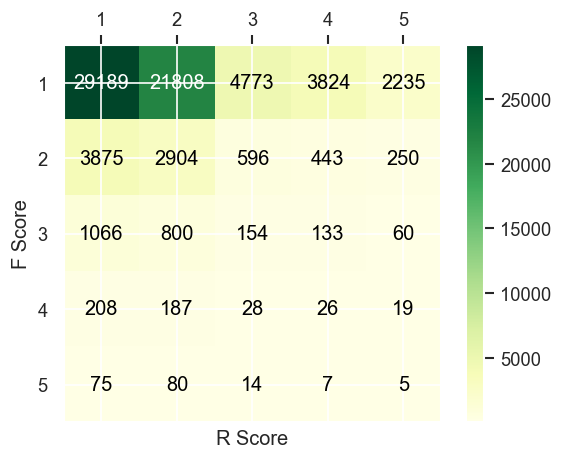

In [96]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_count, ax = ax)
fig.tight_layout()
plt.show()

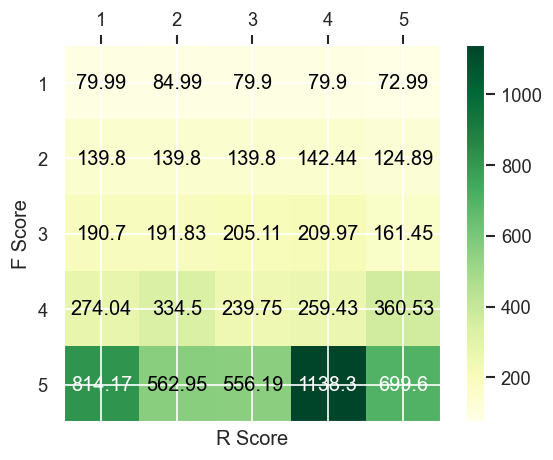

In [97]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_median, ax = ax)
fig.tight_layout()
plt.show()

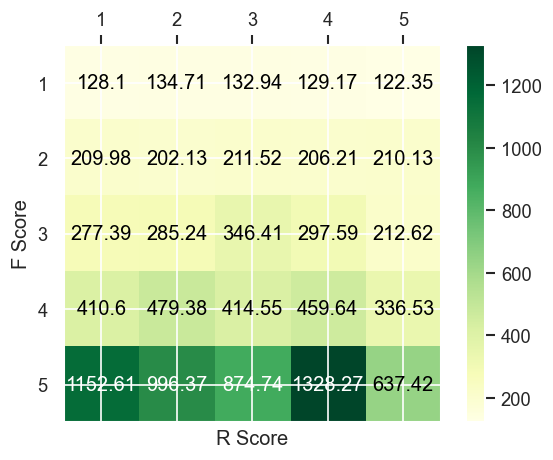

In [98]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_mean, ax = ax)
fig.tight_layout()
plt.show()

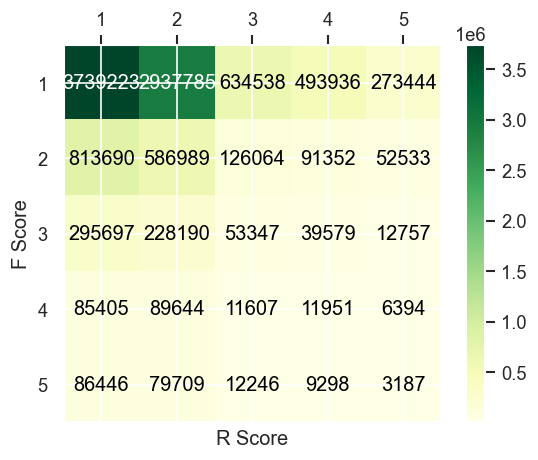

In [99]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_sum, ax = ax)
fig.tight_layout()
plt.show()

### Short Summary:
1. High-frequency buyers (especially F-score = 5, frequency > 6/year) contribute the most to the company.
2. High frequency and most recent buyers (high F and R scores) are the ones we should definitely keep.
3. Medium Frequency (F-score = 3) are the groups we want to save (give incentives), especially for those ones who have R-score > 2.
4. The number of new customers is quite low, so the company should lunch some customer acquisition campaigns.
5. There are quite some low frequency and low recency score buyers, which means the customers may lose interest in the website or products. The company should dive deep to investigate and save this group because new customer acquisitions are expensive.

### Assign Customer Segmentation based on RFM Scores

It might not be practical to work on 5x5x5 = 125 RFM group individually. Some groups are too small, so it is hard for marketers to work on too many groups. 
Therefore, we combine some of the groups based on their RFM properties. We further assign customer segmentation for marketing purposes to give the marketers a clear goal to work on.


#### Segment Description
- **VIPs**: For those whose recent purchases are within 180 days and have bought more than 5 times in a year.
- **Potential loyalists**: For those whose recent purchases are within 180 days and have bought 3-4 times in a year.
- **Need to focus**: For those who have bought only 2 times in the past year.
- **Good old friends**: For those who have bought more than 3 times didn't purchase within 180 days.
- **New customers**: For those who have only purchased once and their recent purchase is less than 30 days.
- **Hibernating**: For those who have only purchased once, and their recent purchase has been more than 30 days.

#### Actions
- **VIPs**: Keep them happy (at any cost).
- **Potential loyalists**: Should give incentives to increase their tendency to buy more times on the website.
- **Need to focus**: They have moderate monetary contributions, but the marketer should turn them in the potential groups ASAP; otherwise, they may turn to hibernate.
- **Good old friends**: They were loyal, but it seems we are losing them. Give them incentives to recall their good memories (recommendation comes in because we have their purchase history) and make them have a recent purchase.
- **New customers**: Make them want to purchase the second time; otherwise, they'll go hibernating.
- **Hibernating**: We don't know them much, and they didn't purchase within a month. We need to guess to motivate them to buy another time. 


#### RFM Group
- **VIPs**: 25x, 35x, 45x, 55x, 24x, 34x, 44x, 54x, where x = 1...5
- **Potential loyalists**: 23x, 33x, 43x, 53x, where x = 1...5
- **Need to focus**: 12x, 22x, 32x, 42x, 52x, where x = 1...5
- **Good old frends**: 13x, 14x, 15x, where x = 1...5
- **New customers**: 41x, 51x, where x = 1...5 
- **Hibernating**: 11x, 21x, 31x, where x = 1...5


### Let's see how it becomes after we reduced segments from 5x5x5 RFM groups down to 6 marketing gruops

In [100]:
segmentation = {
    r'[2-5][4-5]': 'VIPs',
    r'[2-5]3': 'Potential loyalists',
    r'[1-5]2': 'Need to focus',
    r'1[3-5]': 'Good old frends',
    r'[4-5]1': 'New customers',
    r'[1-3]1': 'Hibernating',
}

In [101]:
rfm['Segment'] = rfm['R_score'] * 10 + rfm['F_score']
rfm['Segment'] = rfm['Segment'].astype(str)

In [102]:
rfm['Segment'] = rfm['Segment'].replace(segmentation, regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,R_score,F_score,M_score,RFM_score,Segment
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,4,3,11,2,1,1,211,Hibernating
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,4,1,8,2,1,1,211,Hibernating
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,4,1,7,1,1,1,111,Hibernating
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,4,4,10,1,1,1,111,Hibernating
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,3,4,3,10,2,1,1,211,Hibernating


In [103]:
rfm_segment = rfm.groupby('Segment').agg({'recency': ['mean', 'median'], 
                                          'frequency': ['mean', 'median'], 
                                          'monetary': ['mean', 'median', 'sum', 'count']}).round(0).astype(int)
rfm_segment

recency        frequency        monetary                  \
                       mean median      mean median     mean median      sum   
Segment                                                                        
Good old frends         268    273         4      3      347    216   467548   
Hibernating             189    187         1      1      131     81  7311547   
Need to focus           175    174         2      2      207    140  1670627   
New customers            18     18         1      1      127     79   767380   
Potential loyalists      93     97         3      3      291    195   333873   
VIPs                     95    101         7      6      612    400   224037   

                            
                     count  
Segment                     
Good old frends       1349  
Hibernating          55770  
Need to focus         8068  
New customers         6059  
Potential loyalists   1147  
VIPs                   366

In [104]:
segment_counts = rfm_segment['monetary']['count'].sort_values(ascending = True)
segment_counts

Segment
VIPs                     366
Potential loyalists     1147
Good old frends         1349
New customers           6059
Need to focus           8068
Hibernating            55770
Name: count, dtype: int32

In [105]:
segment_monetary_sum = rfm_segment['monetary']['sum'].sort_values(ascending = True)
segment_monetary_sum

Segment
VIPs                    224037
Potential loyalists     333873
Good old frends         467548
New customers           767380
Need to focus          1670627
Hibernating            7311547
Name: sum, dtype: int32

In [106]:
def hbar(data):
    
    num_of_segment = len(data)
    
    ax.set_frame_on(False)
    ax.set_yticks(range(num_of_segment))
    ax.set_yticklabels(data.index)

    bars = ax.barh(range(num_of_segment), data, color='silver')

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if data.index[i] in ['VIPs']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),int(value*100/data.sum())),
                    va='center',
                    ha='left')

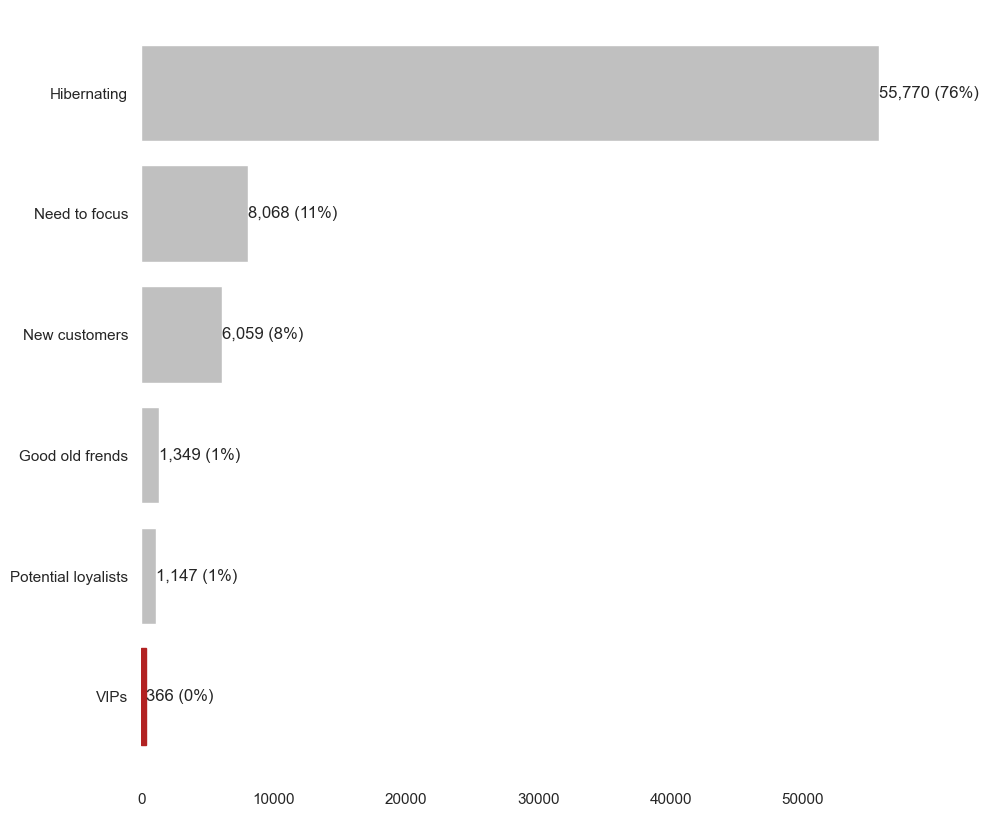

In [107]:
fig, ax = plt.subplots()
hbar(segment_counts)
plt.show()

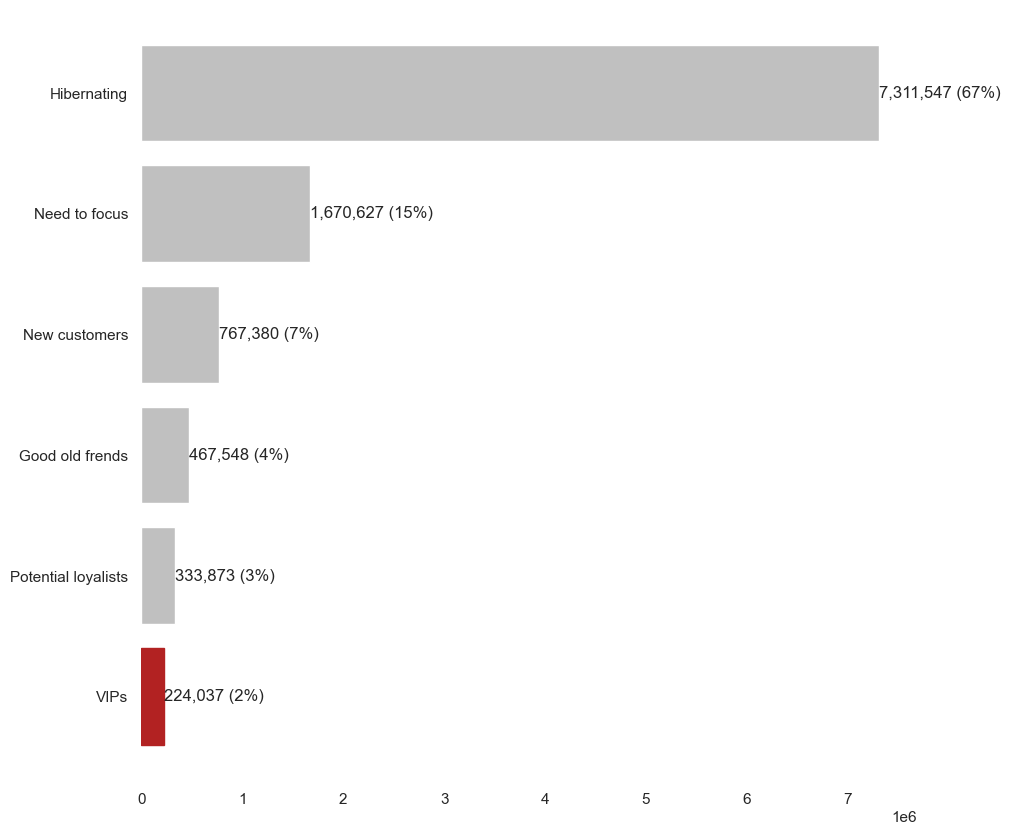

In [108]:
fig, ax = plt.subplots()
hbar(segment_monetary_sum)
plt.show()

#### Short Summary:
- VIPs are the champian, which contributes the most, but it only contributes 2% of our total customers.
- Hibernating group has a lot of people (67%). Although they didn't make any recent purchase within 180 days, it accumulated moderate income. However, since we don't know them much, it's better to investigate why they only purchased once and left.
- We don't see many new customers joining in (7%), so the customer base is relatively stable.
- It's good to see we don't have too many people in the "Good old friends" group, which means those who purchased more than three times tend to stay and keep buying within 180 days cycle.


#### Calucalate Silhoutte Score

In [109]:
# Define x
x = rfm[['recency', 'frequency', 'monetary']]
# Scale
scaler = StandardScaler()
# Data Scale
x_scaled = scaler.fit_transform(x)
# Calculate Silhoutte Score
labels = rfm['RFM_Score']
silhoutte_value = silhouette_score(x_scaled, labels)
print('Silhoutte Score for RFM:', silhoutte_value)

Silhoutte Score for RFM: -0.11443209777837651


## K-Means:
K-Means is an algorithm that can be used for *clustering*. The K-Means algorithm uses the same distance concept as the KNN algorithm. One of the distance concepts used is *Euclidean*. Because the K-Means algorithm uses the concept of distance, we have to *scaling* the *feature* that we have because the *feature* is *scaling* not the same. The *feature* that we have indicates an *outlier* and we don't want the *outlier* data to have any effect, so the scaling that can be used is *Standard Scaler*.

In [110]:
# Scale
scaler = StandardScaler()

# Data Scale
x_scaled = scaler.fit_transform(x)

In [111]:
score = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)

  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [112]:
for i in range(len(score)):
  print(f'Silhouette Score for {i+2} Cluster', round(score[i], 3))

Silhouette Score for 2 Cluster 0.391
Silhouette Score for 3 Cluster 0.428
Silhouette Score for 4 Cluster 0.448
Silhouette Score for 5 Cluster 0.454
Silhouette Score for 6 Cluster 0.462
Silhouette Score for 7 Cluster 0.397
Silhouette Score for 8 Cluster 0.404


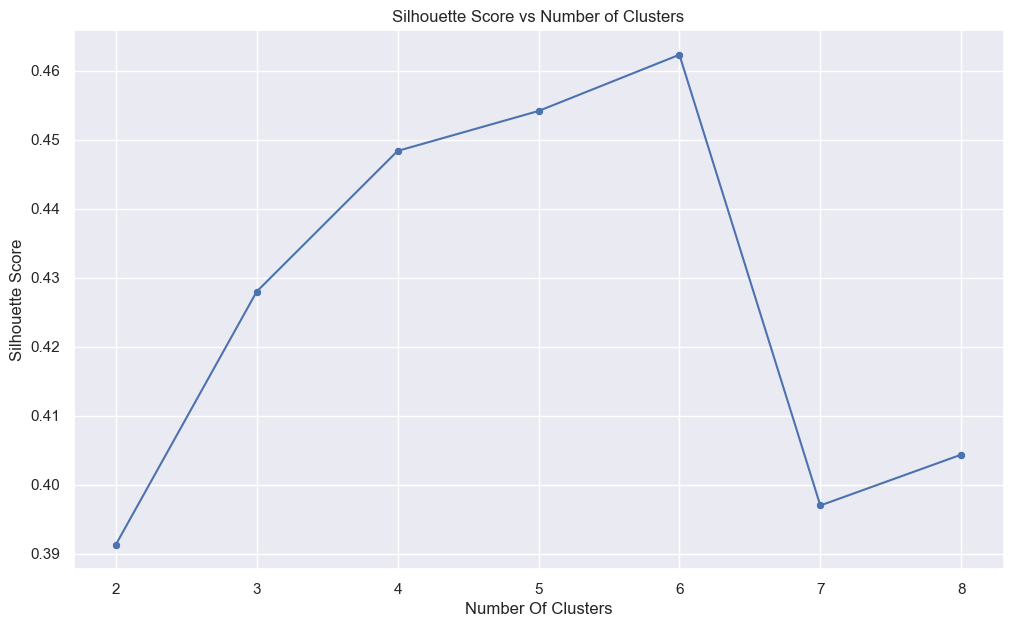

In [113]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=number_of_clusters, y=score)
sns.scatterplot(x=number_of_clusters, y=score)

plt.xlabel("Number Of Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show() 


> Description:
- The best *Silhoutte Score* is obtained in cluster 6
- We decided not to use 6 *clusters* because the *clusters* that are formed are most likely only *customers* with *frequency* 1 time with low *monetary* and *customers* outside the *cluster*
- We will use 5 *clusters* because 5 *clusters* have the highest *silhoutte score* after 6

In [114]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

rfm['label k-means'] = kmeans.labels_

In [115]:
label = rfm['label k-means']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score

0.4542082335930818

In [116]:
def label(x):
  if x == 0:
    return 'New Customer'
  elif x == 1:
    return 'Hibernating'
  elif x == 2:
    return 'Need to focus'
  elif x == 3:
    return 'Potential loyalists'
  else:
    return 'VIP'

rfm['label k-means'] = rfm['label k-means'].apply(label)


- VIP : Customers who made transactions recently, frequently make transactions, and have the highest total transactions.
- Potential loyalists: Customers who make transactions with the highest total transactions.
- New Customer: A customer who made a recent transaction and only made 1 transaction.
- Need to focus: Customers who have not made transactions for a long time, but the frequency and total transactions are above the average of other customers.
- Hibernating : Customers who haven't made a transaction for a long time, only made one transaction, and the total transaction was small

In [117]:
# Number of Customers in Each Segment
rfm['label k-means'].value_counts()

label k-means
New Customer           34473
Hibernating            33918
Potential loyalists     2668
Need to focus           1588
VIP                      112
Name: count, dtype: int64

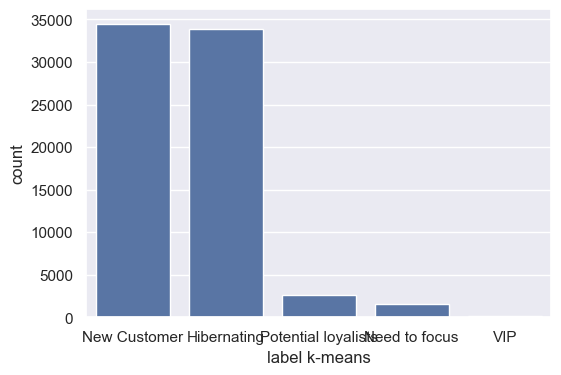

In [118]:
## Visualisasi
plt.figure(figsize = (6,4))
sns.countplot(x='label k-means', data = rfm)
plt.show()

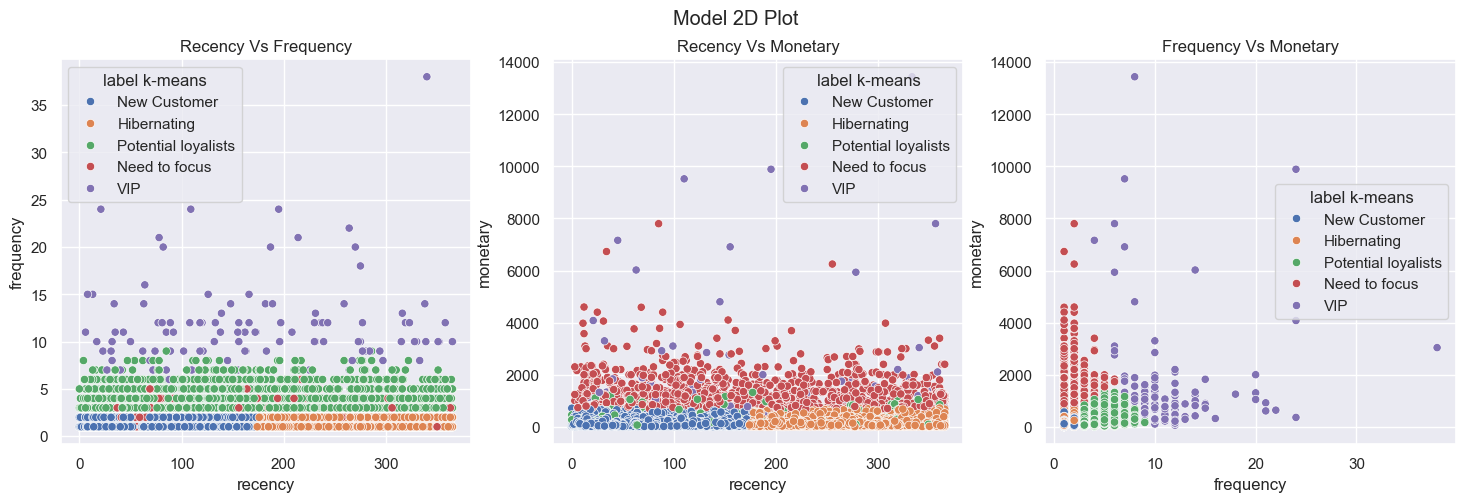

In [119]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()

In [120]:
rfm = rfm[['recency', 'frequency', 'monetary']]

In [121]:
score2 = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  gsm = GaussianMixture(n_components=i)
  gsm.fit(x)

  label = gsm.predict(x)
  score2.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [122]:
for i in range(len(score2)):
  print(f'Silhouette Score for {i+2} Cluster', round(score2[i], 3))

Silhouette Score for 2 Cluster 0.446
Silhouette Score for 3 Cluster 0.304
Silhouette Score for 4 Cluster 0.429
Silhouette Score for 5 Cluster 0.322
Silhouette Score for 6 Cluster 0.321
Silhouette Score for 7 Cluster 0.272
Silhouette Score for 8 Cluster 0.347


Text(0, 0.5, 'Silhoutte Score')

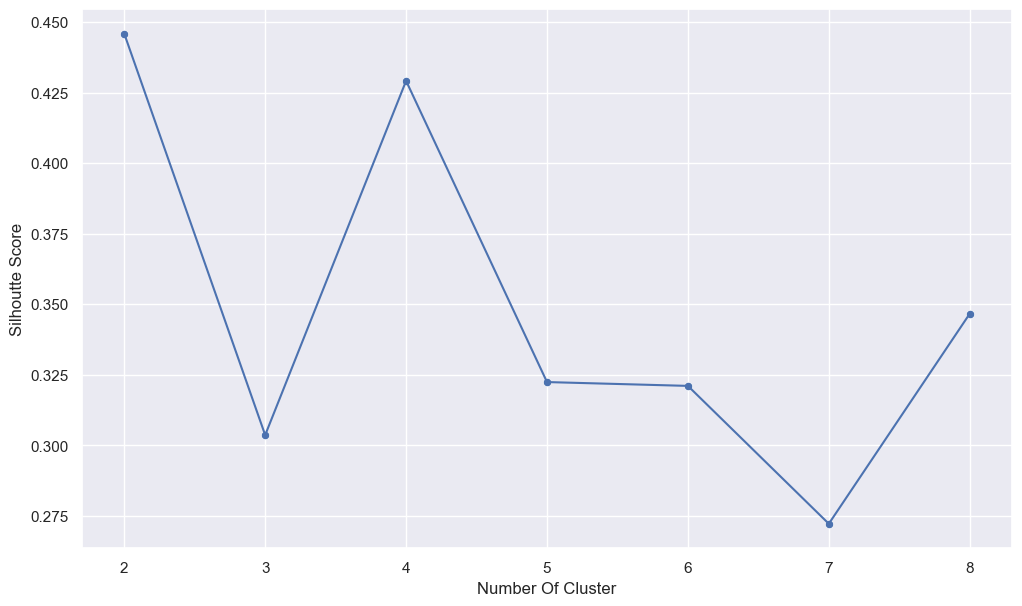

In [123]:
plt.figure(figsize = (12, 7))

sns.lineplot(x=number_of_clusters, y=score2)
sns.scatterplot(x=number_of_clusters, y=score2)

plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')

In [124]:
gsm = GaussianMixture(n_components=3)
gsm.fit(x)

rfm['label gaussian'] = gsm.predict(x)

In [125]:
rfm['label gaussian'].value_counts()

label gaussian
0    59951
1     7816
2     4992
Name: count, dtype: int64

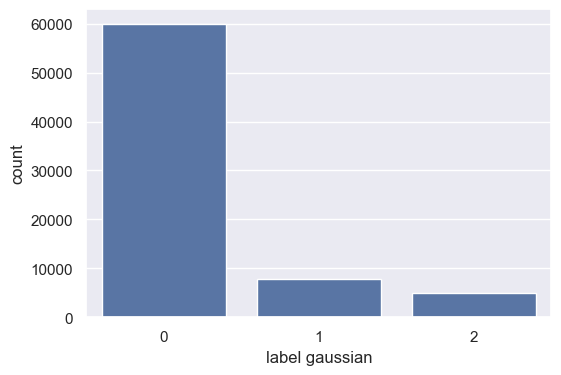

In [126]:
## Visualisasi
plt.figure(figsize = (6,4))
sns.countplot(x='label gaussian', data = rfm)
plt.show()

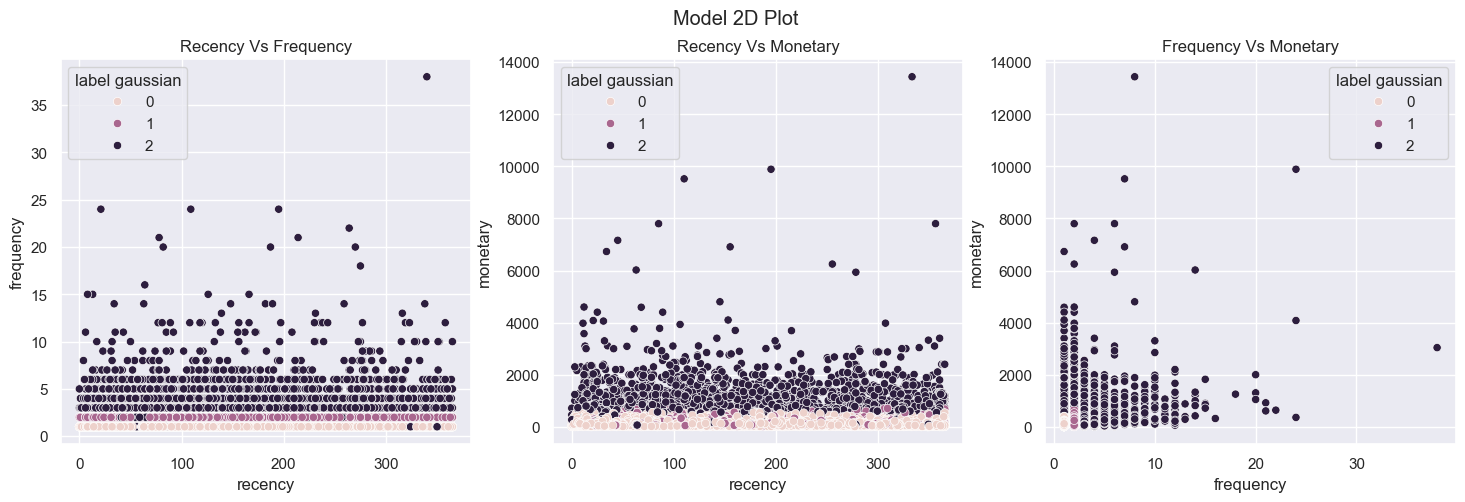

In [127]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label gaussian', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label gaussian', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label gaussian', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()

# IV. Product Recommendation System
---
At this section, we want to make a recommendation system for the product. If we input a product ID number, this system will recomend product for this customer.
First, we gonna look at the order dataset.

In [128]:
df1.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery',
       'payment_type', 'payment_value', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [129]:
rec_data = pd.merge(df,products,on='product_id',how='left') 

In [130]:
df.columns


Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery'],
      dtype='object')

In [131]:
rec_data =pd.read_csv('data/rec_data.csv',sep=',')

In [132]:
rec_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,19866247db89845ef558ef19a6c26fcd,5,NaN,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,32921b4e09c9a19d61fe46ce04231b84,5,NaN,NaN,2018-07-14 00:00:00,2018-07-16 16:20:04,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,74c9c7d0bc153bbbc92e4c1597b8ba55,5,NaN,NaN,2018-04-17 00:00:00,2018-04-18 04:29:47,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP


We only need particular columns, so we slice the dataset and define new dataset as order_rating.

In [133]:
rec_data_rating = rec_data.loc[:, ['customer_unique_id', 'product_id', 'review_score']]

In [134]:
rec_data_rating = rec_data_rating[rec_data_rating['product_id'].isin(
    rec_data_rating['product_id'].value_counts()[
        rec_data_rating['product_id'].value_counts() > 10].index)]

In [135]:
rec_data_rating = rec_data_rating.reset_index()

Moreover, we want to make a matrix between customers and products, and it will have score if the customer give review to particular products. The following is the matrix between customers and products.

In [136]:
ratings_utility_matrix = rec_data_rating.pivot_table(values='review_score',
                                                  index='customer_unique_id',
                                                  columns='product_id',
                                                  fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,...,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005e1862207bf6ccc02e4228effd9a0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005ef4cd20d2893f0d9fbd94d3c0d97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006fdc98a402fceb4eb0ee528f6a8d4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, the shape of the matrix is quite big.

In [137]:
ratings_utility_matrix.shape

(41154, 1670)

For easier analysis, we want to transpose the matrix and we can see the size below.

In [138]:
X = ratings_utility_matrix.T
X.head()

customer_unique_id,0000366f3b9a7992bf8c76cfdf3221e2,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,0006fdc98a402fceb4eb0ee528f6a8d4,00090324bbad0e9342388303bb71ba0a,000de6019bb59f34c099a907c151d855,000ed48ceeb6f4bf8ad021a10a3c7b43,0010fb34b966d44409382af9e8fd5b77,001147e649a7b1afd577e873841632dd,...,ffef0ffa736c7b3d9af741611089729b,fff1afc79f6b5db1e235a4a6c30ceda7,fff2ae16b99c6f3c785f0e052f2a9cfb,fff3a9369e4b7102fab406a334a678c3,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffbf87b7a1a6fa8b03f081c5f51a201,fffea47cd6d3cc0a88bd621562a9d061,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, I am going to define a function to build a recommendation system. This function will fit the data into the model. This function build using the truncated SVD matrix reducing the components to 10. This function output will be a correlation matrix for product pairwisely.

In [139]:
def fitsystemrecommendation(ratings_utility_matrix):
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    return correlation_matrix

In [140]:
from sklearn.decomposition import TruncatedSVD
correlation_matrix = fitsystemrecommendation(ratings_utility_matrix)

Moreover, I am gonna build a system recommendation function by inputing the product id, and this function will locate the first index found. Next, the function will show you the product that have high correlation with this product.


In [141]:
def systemrecommendation(prod_id):
    rec_data_rating.index[rec_data_rating['product_id'] == prod_id].tolist()[1]
    product_names = list(X.index)
    product_ID = product_names.index(prod_id)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
    Recommend.remove(prod_id)
    return pd.DataFrame(Recommend[0:9], columns=['Recommendation'])

For example, the following program show you the recommendation if you buy product with product id: 'ff2c1ec09b1bb340e84f0d6b21cc7dbb'.

In [142]:
systemrecommendation('ff2c1ec09b1bb340e84f0d6b21cc7dbb')

,Recommendation
0,03e4e6709b7d6415746769c0bc3e9131
1,04c4a4b9c924494fcf82e0fba966f955
2,054515fd15bc1a2029f10de97ffa9120
3,05a9dadb8402b6b7ae3dd28f7da187b5
4,07f381c65e8e66460c07781b9b1b8834
5,09c3a2ea33f044aebffecd6681e00133
6,0a4093a4af429dc0a9334300e5c13ae5
7,0a9a9c25c5a06532d1766e00db833a7f
8,0ec7b6a863e219792bc4d50d3a62a839


We can see the recommendation when we input product id: 'ff2c1ec09b1bb340e84f0d6b21cc7dbb'. By using the function I have defined, this recommendation have high correlation with the product. Therefore, I suggest the company to promote this recommendation product when the product inputted is purchased of viewed. 
